<a href="https://colab.research.google.com/github/AlamProgram/Machine_Learning_Project/blob/main/Final_Project_Smoker_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Import Library & Load Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Mengatur opsi untuk menampilkan semua kolom
pd.set_option('display.max_columns', None)

In [ ]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/2. Mechine Learning/Kelas ML/PROJECT/FINAL Project: Smoker Detector/playground-series-s3e24/train.csv')

In [ ]:
df.head()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,55,165,60,81.0,0.5,0.6,1,1,135,87,94,172,300,40,75,16.5,1,1.0,22,25,27,0,1
1,1,70,165,65,89.0,0.6,0.7,2,2,146,83,147,194,55,57,126,16.2,1,1.1,27,23,37,1,0
2,2,20,170,75,81.0,0.4,0.5,1,1,118,75,79,178,197,45,93,17.4,1,0.8,27,31,53,0,1
3,3,35,180,95,105.0,1.5,1.2,1,1,131,88,91,180,203,38,102,15.9,1,1.0,20,27,30,1,0
4,4,30,165,60,80.5,1.5,1.0,1,1,121,76,91,155,87,44,93,15.4,1,0.8,19,13,17,0,1


Cek Mising Value

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   159256 non-null  int64  
 1   age                  159256 non-null  int64  
 2   height(cm)           159256 non-null  int64  
 3   weight(kg)           159256 non-null  int64  
 4   waist(cm)            159256 non-null  float64
 5   eyesight(left)       159256 non-null  float64
 6   eyesight(right)      159256 non-null  float64
 7   hearing(left)        159256 non-null  int64  
 8   hearing(right)       159256 non-null  int64  
 9   systolic             159256 non-null  int64  
 10  relaxation           159256 non-null  int64  
 11  fasting blood sugar  159256 non-null  int64  
 12  Cholesterol          159256 non-null  int64  
 13  triglyceride         159256 non-null  int64  
 14  HDL                  159256 non-null  int64  
 15  LDL              

Info:
1. no missing value


Drop ID

In [ ]:
df  = df.drop(columns=['id'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   age                  159256 non-null  int64  
 1   height(cm)           159256 non-null  int64  
 2   weight(kg)           159256 non-null  int64  
 3   waist(cm)            159256 non-null  float64
 4   eyesight(left)       159256 non-null  float64
 5   eyesight(right)      159256 non-null  float64
 6   hearing(left)        159256 non-null  int64  
 7   hearing(right)       159256 non-null  int64  
 8   systolic             159256 non-null  int64  
 9   relaxation           159256 non-null  int64  
 10  fasting blood sugar  159256 non-null  int64  
 11  Cholesterol          159256 non-null  int64  
 12  triglyceride         159256 non-null  int64  
 13  HDL                  159256 non-null  int64  
 14  LDL                  159256 non-null  int64  
 15  hemoglobin       

Drop Duplicate

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   age                  159256 non-null  int64  
 1   height(cm)           159256 non-null  int64  
 2   weight(kg)           159256 non-null  int64  
 3   waist(cm)            159256 non-null  float64
 4   eyesight(left)       159256 non-null  float64
 5   eyesight(right)      159256 non-null  float64
 6   hearing(left)        159256 non-null  int64  
 7   hearing(right)       159256 non-null  int64  
 8   systolic             159256 non-null  int64  
 9   relaxation           159256 non-null  int64  
 10  fasting blood sugar  159256 non-null  int64  
 11  Cholesterol          159256 non-null  int64  
 12  triglyceride         159256 non-null  int64  
 13  HDL                  159256 non-null  int64  
 14  LDL                  159256 non-null  int64  
 15  hemoglobin       

Cek Proporsi 1 dan 0

In [ ]:
df_smoker_precentage = df['smoking'].value_counts()
df_smoker_precentage

,count
smoking,
0,89603
1,69653


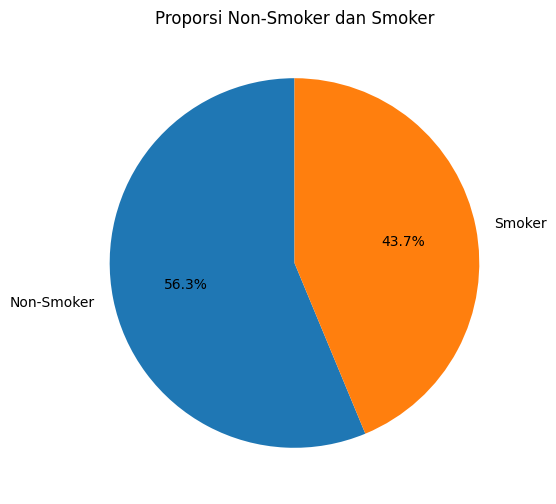

In [ ]:
plt.figure(figsize=(6, 6))
plt.pie(df_smoker_precentage, labels=['Non-Smoker', 'Smoker'], autopct='%1.1f%%', startangle=90)
plt.title('Proporsi Non-Smoker dan Smoker')
plt.show()

Info:
1. no need balancing

#Train Temp Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Pisahkan data menjadi data train dan data temp (gabungan validasi dan test)
df_train, df_temp = train_test_split(df, test_size=0.3, random_state=42, shuffle=True)

# Sekarang Anda memiliki:
# df_train: DataFrame yang hanya berisi data training
# df_temp: DataFrame yang berisi gabungan data validasi dan test


# EDA & Feature Enginering

## Age

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111479 entries, 17406 to 121958
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   age                  111479 non-null  int64  
 1   height(cm)           111479 non-null  int64  
 2   weight(kg)           111479 non-null  int64  
 3   waist(cm)            111479 non-null  float64
 4   eyesight(left)       111479 non-null  float64
 5   eyesight(right)      111479 non-null  float64
 6   hearing(left)        111479 non-null  int64  
 7   hearing(right)       111479 non-null  int64  
 8   systolic             111479 non-null  int64  
 9   relaxation           111479 non-null  int64  
 10  fasting blood sugar  111479 non-null  int64  
 11  Cholesterol          111479 non-null  int64  
 12  triglyceride         111479 non-null  int64  
 13  HDL                  111479 non-null  int64  
 14  LDL                  111479 non-null  int64  
 15  hemoglobin        

In [ ]:
# Menghitung jumlah perokok untuk setiap kelompok usia
smokers_per_age = df_train.groupby('age')['smoking'].sum()
smokers_per_age

,smoking
age,
20,1509
25,3389
30,4442
35,5696
40,15412
45,5473
49,0
50,4437
55,3118


In [ ]:
# Menghitung total jumlah orang untuk setiap kelompok usia
total_per_age = df['age'].value_counts()
total_per_age

,count
age,
40,46691
60,19043
45,18480
50,15768
55,13446
35,13081
30,11465
25,9140
20,3829


In [ ]:
# Menghitung persentase perokok untuk setiap kelompok usia
percentage_smokers_by_age = (smokers_per_age / total_per_age)
percentage_smokers_by_age

,0
age,
20,0.394098
25,0.370788
30,0.387440
35,0.435441
40,0.330085
45,0.296158
49,0.000000
50,0.281393
55,0.231891


In [ ]:
# grouping age agar tidak overvitting pada umur2 tertentu yang data perokoknya ekstrim (sama sekali tidak ada perokok)
# yang berisiko mengakibatkan model mengidentifikasi pada umur tertentu tidak mungkin ada perokok. padalah mungkin saja pada kasus lain di umur yang sama ada prokok

def age_group(age):
    if 20 <= age <40:
        return 1 # high prob
    elif 40 <= age <= 50:
        return 2 # medium prob
    elif 50 < age <= 60:
        return 3 # low prob
    elif age > 60:
        return 4

df_train['age_catg'] = df_train['age'].apply(age_group)
    # Baris kode ini bertugas untuk membuat kolom baru di dalam df_train,
    # yang dinamai 'age_catg'. Nilai-nilai di kolom baru ini berasal dari hasil penerapan
    # fungsi age_group ke setiap baris di kolom 'age' yang sudah ada.

In [ ]:
# Menghitung jumlah perokok untuk setiap kelompok age
smoker_per_age_catg = df_train.groupby('age_catg')['smoking'].sum()
smoker_per_age_catg

,smoking
age_catg,
1,15036
2,25322
3,7051
4,1153


In [ ]:
# Menghitung jumlah populasi untuk setiap kelompok age
total_per_age_catg = df_train['age_catg'].value_counts()
total_per_age_catg

,count
age_catg,
2,56859
1,26146
3,22699
4,5775


In [ ]:
percentage_smoker_per_age_catg = (smoker_per_age_catg / total_per_age_catg)
percentage_smoker_per_age_catg

,0
age_catg,
1,0.575078
2,0.445347
3,0.310630
4,0.199654


In [ ]:
# Membuat dictionary mapping usia ke persentase perokok
percentage_map = percentage_smoker_per_age_catg.to_dict()

# Membuat kolom baru 'percentage_smokers' berdasarkan nilai di kolom 'age'
df_train['%smoker_age'] = df_train['age_catg'].map(percentage_map)

df_train.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking,age_catg,%smoker_age
17406,45,165,70,83.2,1.0,0.8,1,1,136,89,84,172,190,41,93,14.7,1,1.1,24,36,72,1,1,2,0.445347
61303,50,160,60,76.0,1.0,1.2,1,1,117,76,109,205,59,77,116,14.7,1,0.9,34,25,95,0,1,2,0.445347
71781,40,160,50,64.0,0.9,0.7,1,1,94,61,94,186,145,62,95,13.3,1,0.6,17,14,15,0,1,2,0.445347
67014,60,155,55,76.0,0.9,1.0,1,1,100,66,84,167,59,61,95,12.9,1,0.7,38,27,21,0,0,3,0.310630
73322,60,155,55,75.0,0.7,1.0,2,2,136,86,99,171,110,46,104,14.0,1,0.5,25,15,13,0,0,3,0.310630


Info:
1. semakin tua, peluang orang untuk merokok semakin kecil.

In [ ]:
df_train.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking,age_catg,%smoker_age
17406,45,165,70,83.2,1.0,0.8,1,1,136,89,84,172,190,41,93,14.7,1,1.1,24,36,72,1,1,2,0.445347
61303,50,160,60,76.0,1.0,1.2,1,1,117,76,109,205,59,77,116,14.7,1,0.9,34,25,95,0,1,2,0.445347
71781,40,160,50,64.0,0.9,0.7,1,1,94,61,94,186,145,62,95,13.3,1,0.6,17,14,15,0,1,2,0.445347
67014,60,155,55,76.0,0.9,1.0,1,1,100,66,84,167,59,61,95,12.9,1,0.7,38,27,21,0,0,3,0.310630
73322,60,155,55,75.0,0.7,1.0,2,2,136,86,99,171,110,46,104,14.0,1,0.5,25,15,13,0,0,3,0.310630


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111479 entries, 17406 to 121958
Data columns (total 25 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   age                  111479 non-null  int64  
 1   height(cm)           111479 non-null  int64  
 2   weight(kg)           111479 non-null  int64  
 3   waist(cm)            111479 non-null  float64
 4   eyesight(left)       111479 non-null  float64
 5   eyesight(right)      111479 non-null  float64
 6   hearing(left)        111479 non-null  int64  
 7   hearing(right)       111479 non-null  int64  
 8   systolic             111479 non-null  int64  
 9   relaxation           111479 non-null  int64  
 10  fasting blood sugar  111479 non-null  int64  
 11  Cholesterol          111479 non-null  int64  
 12  triglyceride         111479 non-null  int64  
 13  HDL                  111479 non-null  int64  
 14  LDL                  111479 non-null  int64  
 15  hemoglobin        

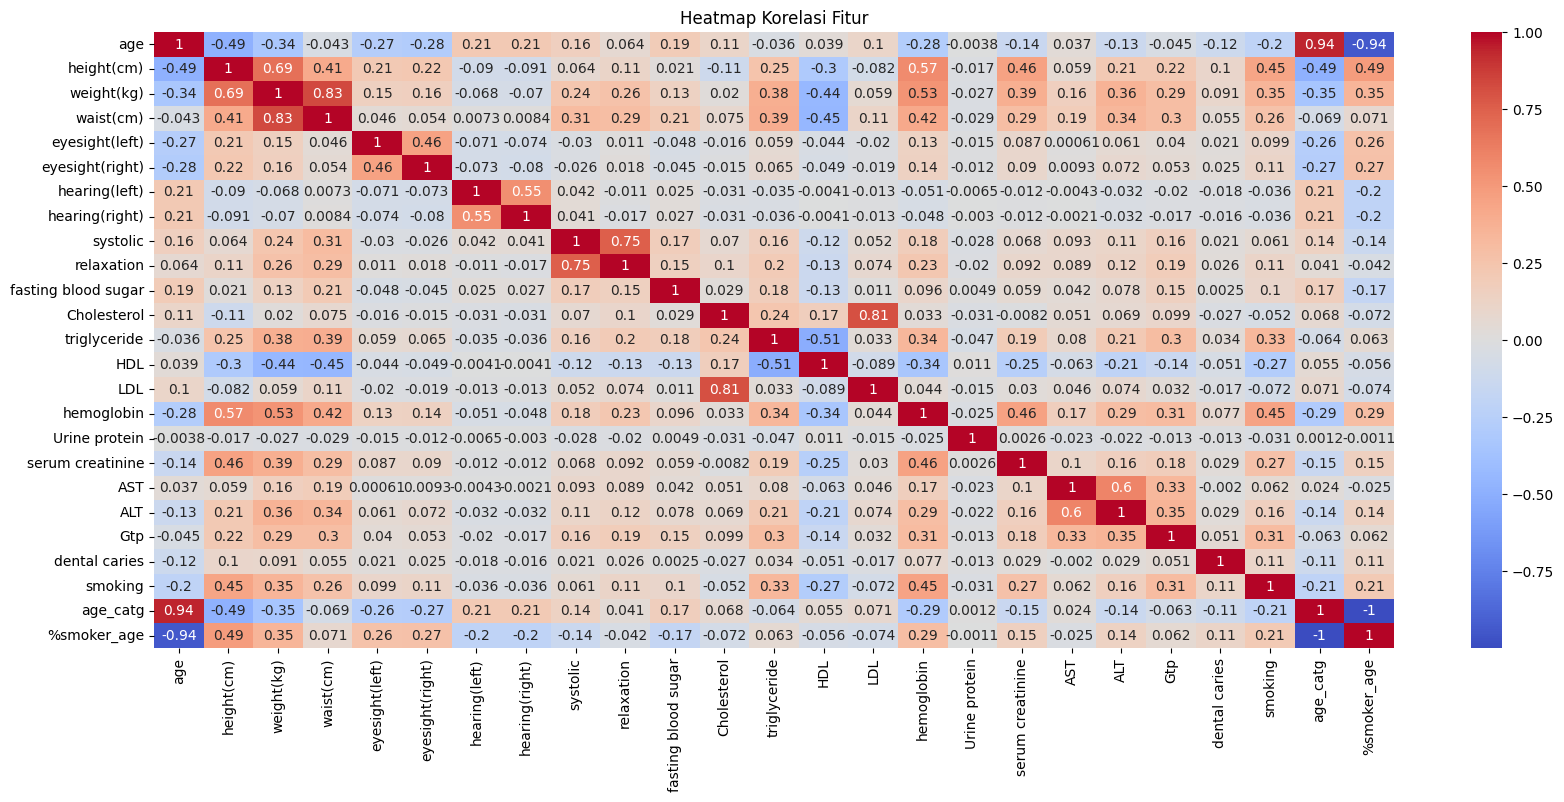

In [ ]:
# buat heatmap
plt.figure(figsize=(20, 8))
sns.heatmap(df_train.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi Fitur')
plt.show()

In [ ]:
# terdapat multico antara waight dan waist
df_train = df_train.drop(columns=['waist(cm)'])

## BMI (weight, hight, age)

In [ ]:
# buat kolom BMI, konvert cm ke m
df_train['BMI'] = df_train['weight(kg)'] / (df_train['height(cm)'] / 100) ** 2

In [ ]:
df_train.head(3)

,age,height(cm),weight(kg),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking,age_catg,%smoker_age,BMI
17406,45,165,70,1.0,0.8,1,1,136,89,84,172,190,41,93,14.7,1,1.1,24,36,72,1,1,2,0.445347,25.711662
61303,50,160,60,1.0,1.2,1,1,117,76,109,205,59,77,116,14.7,1,0.9,34,25,95,0,1,2,0.445347,23.437500
71781,40,160,50,0.9,0.7,1,1,94,61,94,186,145,62,95,13.3,1,0.6,17,14,15,0,1,2,0.445347,19.531250


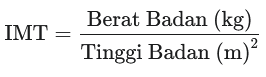

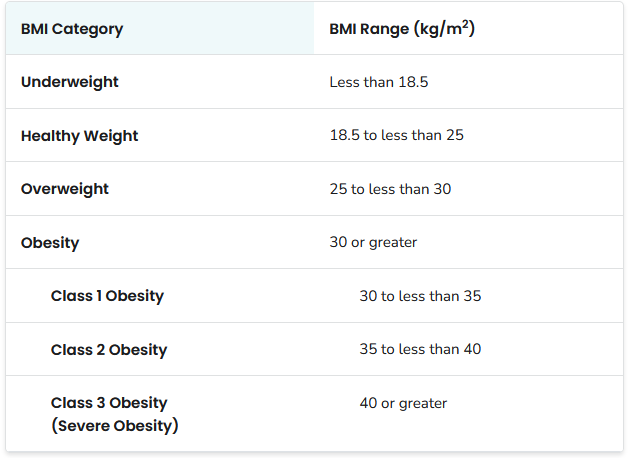

Sumber: https://www.cdc.gov/bmi/adult-calculator/bmi-categories.html

In [ ]:
def BMI_category(BMI):
    if BMI < 18.5:
        return 1 #Underweight
    elif BMI >= 18.5 and BMI < 25:
        return 2 # Healty Weight
    elif BMI >= 25 and BMI < 30:
        return 3 # Overweight
    elif BMI >= 30 and BMI  < 35:
        return 4 # Class 1 Obesity
    elif BMI >= 35 and BMI  <= 40:
        return 5 # Class 2 Obesity
    elif BMI >40:
        return 6 # Class 3 Obesity


df_train['BMI_catg'] = df_train['BMI'].apply(BMI_category)


In [ ]:
df_train.head(3)

,age,height(cm),weight(kg),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking,age_catg,%smoker_age,BMI,BMI_catg
17406,45,165,70,1.0,0.8,1,1,136,89,84,172,190,41,93,14.7,1,1.1,24,36,72,1,1,2,0.445347,25.711662,3
61303,50,160,60,1.0,1.2,1,1,117,76,109,205,59,77,116,14.7,1,0.9,34,25,95,0,1,2,0.445347,23.437500,2
71781,40,160,50,0.9,0.7,1,1,94,61,94,186,145,62,95,13.3,1,0.6,17,14,15,0,1,2,0.445347,19.531250,2


In [ ]:
# Menghitung jumlah perokok untuk setiap kelompok usia
smokers_by_BMI_catg = df_train.groupby('BMI_catg')['smoking'].sum()

# Menghitung total jumlah orang untuk setiap kelompok usia
total_by_BMI_catg = df_train['BMI_catg'].value_counts()

# Menghitung persentase perokok untuk setiap kelompok usia
percentage_smokers_each_BMI_catg = (smokers_by_BMI_catg / total_by_BMI_catg)
percentage_smokers_each_BMI_catg

,0
BMI_catg,
1,0.326038
2,0.386043
3,0.513931
4,0.522978
5,0.513216
6,0.437500


In [ ]:
# Membuat dictionary mapping usia ke persentase perokok
percentage_map_1 = percentage_smokers_each_BMI_catg.to_dict()

# Membuat kolom baru 'percentage_smokers' berdasarkan nilai di kolom 'age'
df_train['%smoker_BMI_catg'] = df_train['BMI_catg'].map(percentage_map_1)

df_train.head()

,age,height(cm),weight(kg),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking,age_catg,%smoker_age,BMI,BMI_catg,%smoker_BMI_catg
17406,45,165,70,1.0,0.8,1,1,136,89,84,172,190,41,93,14.7,1,1.1,24,36,72,1,1,2,0.445347,25.711662,3,0.513931
61303,50,160,60,1.0,1.2,1,1,117,76,109,205,59,77,116,14.7,1,0.9,34,25,95,0,1,2,0.445347,23.437500,2,0.386043
71781,40,160,50,0.9,0.7,1,1,94,61,94,186,145,62,95,13.3,1,0.6,17,14,15,0,1,2,0.445347,19.531250,2,0.386043
67014,60,155,55,0.9,1.0,1,1,100,66,84,167,59,61,95,12.9,1,0.7,38,27,21,0,0,3,0.310630,22.892820,2,0.386043
73322,60,155,55,0.7,1.0,2,2,136,86,99,171,110,46,104,14.0,1,0.5,25,15,13,0,0,3,0.310630,22.892820,2,0.386043


**.to_dict(**):
mengonversi isi dari Series menjadi sebuah dictionary.

In [ ]:
print('Percenage smober by BMI Category')
print(percentage_smokers_each_BMI_catg)

Percenage smober by BMI Category
BMI_catg
1    0.326038
2    0.386043
3    0.513931
4    0.522978
5    0.513216
6    0.437500
dtype: float64


Info:
1. semakin gemuk, peluang orang untuk merokok relatif meningkat. ada indikasi merokok juga  diikuti oleh pola makan yang berlebihan

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111479 entries, 17406 to 121958
Data columns (total 27 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   age                  111479 non-null  int64  
 1   height(cm)           111479 non-null  int64  
 2   weight(kg)           111479 non-null  int64  
 3   eyesight(left)       111479 non-null  float64
 4   eyesight(right)      111479 non-null  float64
 5   hearing(left)        111479 non-null  int64  
 6   hearing(right)       111479 non-null  int64  
 7   systolic             111479 non-null  int64  
 8   relaxation           111479 non-null  int64  
 9   fasting blood sugar  111479 non-null  int64  
 10  Cholesterol          111479 non-null  int64  
 11  triglyceride         111479 non-null  int64  
 12  HDL                  111479 non-null  int64  
 13  LDL                  111479 non-null  int64  
 14  hemoglobin           111479 non-null  float64
 15  Urine protein     

In [ ]:
df_train.head(3)

,age,height(cm),weight(kg),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking,age_catg,%smoker_age,BMI,BMI_catg,%smoker_BMI_catg
17406,45,165,70,1.0,0.8,1,1,136,89,84,172,190,41,93,14.7,1,1.1,24,36,72,1,1,2,0.445347,25.711662,3,0.513931
61303,50,160,60,1.0,1.2,1,1,117,76,109,205,59,77,116,14.7,1,0.9,34,25,95,0,1,2,0.445347,23.437500,2,0.386043
71781,40,160,50,0.9,0.7,1,1,94,61,94,186,145,62,95,13.3,1,0.6,17,14,15,0,1,2,0.445347,19.531250,2,0.386043


## Eyesight (left)
Merokok dapat meningkatkan risiko berbagai penyakit mata yang serius dan bahkan menyebabkan kebutaan.

In [ ]:
smoker_per_eyesight_L = df_train.groupby('eyesight(left)')['smoking'].sum()
smoker_per_eyesight_L

,smoking
eyesight(left),
0.1,163
0.2,197
0.3,458
0.4,657
0.5,1301
0.6,1554
0.7,3326
0.8,3968
0.9,4428


In [ ]:
total_per_eyesight_L = df_train['eyesight(left)'].value_counts()
total_per_eyesight_L

,count
eyesight(left),
1.0,26151
1.2,25485
1.5,15176
0.9,10698
0.8,10593
0.7,9270
0.6,4712
0.5,3874
0.4,2292


In [ ]:
ES_L = smoker_per_eyesight_L / total_per_eyesight_L
ES_L
#

,0
eyesight(left),
0.1,0.324056
0.2,0.306854
0.3,0.293967
0.4,0.286649
0.5,0.335829
0.6,0.329796
0.7,0.358792
0.8,0.374587
0.9,0.413909


In [ ]:
'''
< 35 rendah		    0.1 <= eyesight <= 0.6
35  - 50 sedang		0.6 < eyesight <= 1.3
> 50 tinggi		    1.3 < eyesight <= 2.0
else
'''

def ES_catg(eyesight):
    if 0.1 <= eyesight <= 0.6:
        return 1 #low prob
    elif 0.6 < eyesight <= 1.3:
        return 2 #medium prob
    elif 1.3 < eyesight <= 2.0:
        return 3 # hight prob
    else:
        return 1

df_train['ESL_catg'] = df_train['eyesight(left)'].apply(ES_catg)

In [ ]:
smoker_per_ESL_catg = df_train.groupby('ESL_catg')['smoking'].sum()
smoker_per_ESL_catg

,smoking
ESL_catg,
1,4357
2,35807
3,8398


In [ ]:
total_per_ESL_catg = df_train['ESL_catg'].value_counts()
total_per_ESL_catg

,count
ESL_catg,
2,82205
3,15603
1,13671


In [ ]:
percentage_by_ESL_catg = smoker_per_ESL_catg / total_per_ESL_catg
percentage_by_ESL_catg

,0
ESL_catg,
1,0.318704
2,0.435582
3,0.538230


In [ ]:
percentage_map_ESL = percentage_by_ESL_catg.to_dict()

In [ ]:
df_train['%ESL'] = df_train['ESL_catg'].map(percentage_map_ESL)

In [ ]:
df_train.head(3)

,age,height(cm),weight(kg),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking,age_catg,%smoker_age,BMI,BMI_catg,%smoker_BMI_catg,ESL_catg,%ESL
17406,45,165,70,1.0,0.8,1,1,136,89,84,172,190,41,93,14.7,1,1.1,24,36,72,1,1,2,0.445347,25.711662,3,0.513931,2,0.435582
61303,50,160,60,1.0,1.2,1,1,117,76,109,205,59,77,116,14.7,1,0.9,34,25,95,0,1,2,0.445347,23.437500,2,0.386043,2,0.435582
71781,40,160,50,0.9,0.7,1,1,94,61,94,186,145,62,95,13.3,1,0.6,17,14,15,0,1,2,0.445347,19.531250,2,0.386043,2,0.435582


##Eyesight (Right)

In [ ]:
smoker_per_eyesight_R = df_train.groupby('eyesight(right)')['smoking'].sum()
smoker_per_eyesight_R

,smoking
eyesight(right),
0.1,161
0.2,209
0.3,419
0.4,717
0.5,1341
0.6,1458
0.7,2928
0.8,3903
0.9,4716


In [ ]:
total_per_eyesight_R = df_train['eyesight(right)'].value_counts()
total_per_eyesight_R

,count
eyesight(right),
1.0,26609
1.2,25451
1.5,14539
0.9,10988
0.8,10785
0.7,8545
0.6,4737
0.5,4091
0.4,2487


In [ ]:
SE_R = smoker_per_eyesight_R / total_per_eyesight_R
SE_R

,0
eyesight(right),
0.1,0.285968
0.2,0.287879
0.3,0.283491
0.4,0.288299
0.5,0.327793
0.6,0.307790
0.7,0.342657
0.8,0.361892
0.9,0.429195


In [ ]:
def ESR_catg(eyesight):
    if 0.1 <= eyesight <= 0.7:
        return 1 #low prob
    elif 0.7 < eyesight <= 1.3:
        return 2 #medium prob
    elif 1.3 < eyesight <= 2.0:
        return 3 # hight prob
    else:
        return 1

df_train['ESR_catg'] = df_train['eyesight(right)'].apply(ESR_catg)

In [ ]:
smoker_per_ESR_catg =  df_train.groupby('ESR_catg')['smoking'].sum()
smoker_per_ESR_catg

,smoking
ESR_catg,
1,7257
2,33206
3,8099


In [ ]:
total_per_EST_catg = df_train['ESR_catg'].value_counts()
total_per_EST_catg

,count
ESR_catg,
2,73835
1,22706
3,14938


In [ ]:
percentage_by_ESR_catg = smoker_per_ESR_catg / total_per_EST_catg
percentage_by_ESR_catg

,0
ESR_catg,
1,0.319607
2,0.449733
3,0.542174


In [ ]:
percentage_map_ESR = percentage_by_ESR_catg.to_dict()


In [ ]:
df_train['%ESR'] = df_train['ESR_catg'].map(percentage_map_ESR)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111479 entries, 17406 to 121958
Data columns (total 31 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   age                  111479 non-null  int64  
 1   height(cm)           111479 non-null  int64  
 2   weight(kg)           111479 non-null  int64  
 3   eyesight(left)       111479 non-null  float64
 4   eyesight(right)      111479 non-null  float64
 5   hearing(left)        111479 non-null  int64  
 6   hearing(right)       111479 non-null  int64  
 7   systolic             111479 non-null  int64  
 8   relaxation           111479 non-null  int64  
 9   fasting blood sugar  111479 non-null  int64  
 10  Cholesterol          111479 non-null  int64  
 11  triglyceride         111479 non-null  int64  
 12  HDL                  111479 non-null  int64  
 13  LDL                  111479 non-null  int64  
 14  hemoglobin           111479 non-null  float64
 15  Urine protein     

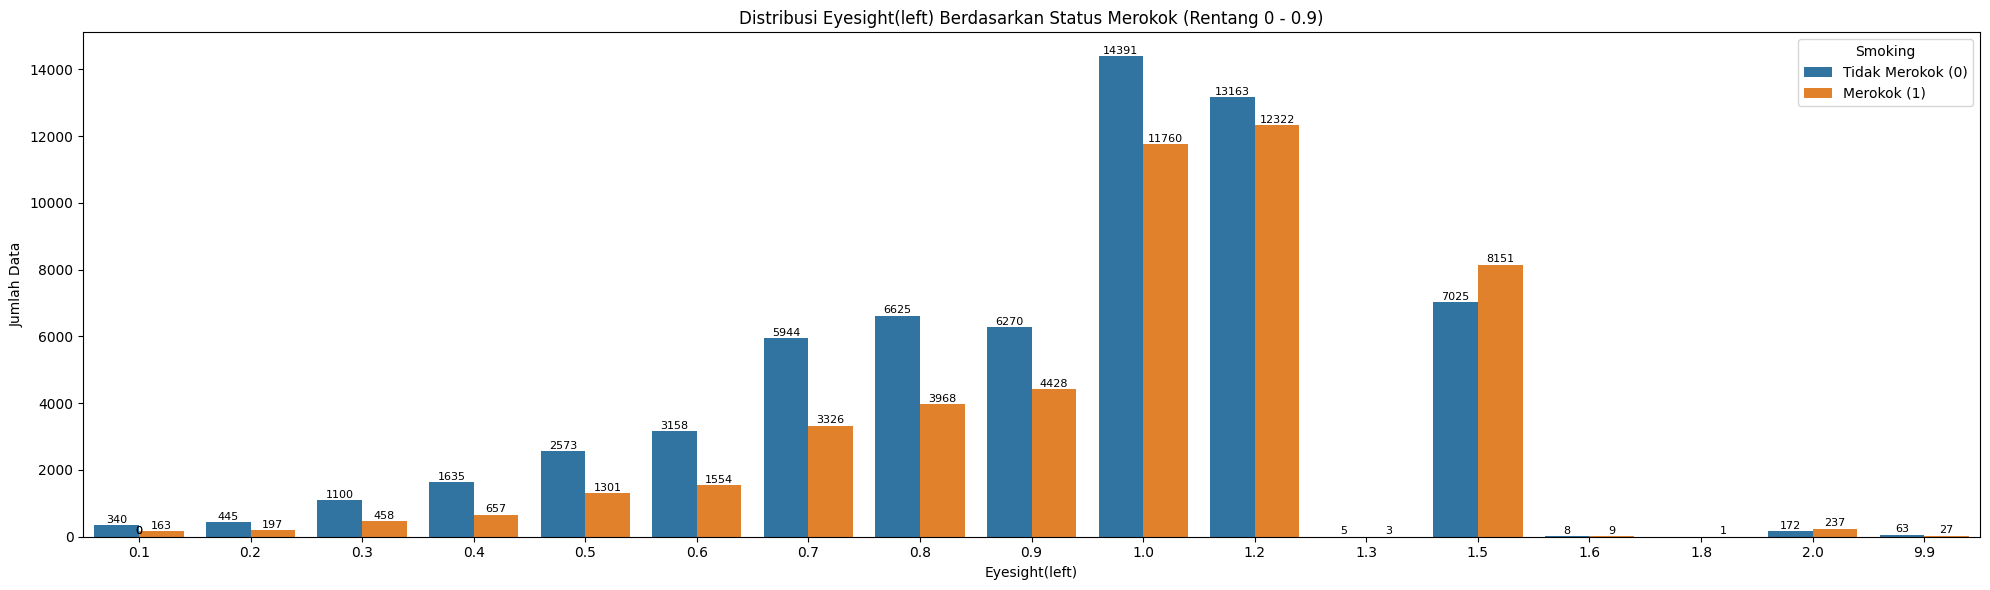

In [ ]:
# Membuat countplot menggunakan seaborn
plt.figure(figsize=(20, 6))  # Mengatur ukuran gambar agar lebih mudah dibaca
sns.countplot(data=df_train, x='eyesight(left)', hue='smoking')

# Menambahkan label dan judul
plt.title('Distribusi Eyesight(left) Berdasarkan Status Merokok (Rentang 0 - 0.9)')
plt.xlabel('Eyesight(left)')
plt.ylabel('Jumlah Data')
plt.legend(title='Smoking', labels=['Tidak Merokok (0)', 'Merokok (1)'])

# Menambahkan anotasi nilai di atas setiap bar (opsional, tapi membantu interpretasi)
for p in plt.gca().patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width()/2., height + 10,
            '{:.0f}'.format(height),
            ha='center', va='bottom', fontsize=8)

# Menampilkan plot
plt.tight_layout()
plt.show()

## Blood Pressure (Systolic, Diastolic/Relaxation)
Sistolik adalah tekanan darah saat jantung berkontraksi (memompa darah keluar). Ini adalah angka atas dalam pembacaan tekanan darah.

Ketika dokter atau alat pengukur tekanan darah mencatat dua angka, misalnya 120/80 mmHg:

    1. 120 adalah tekanan sistolik. Ini menunjukkan tekanan di arteri Anda saat otot jantung Anda memeras (berkontraksi) untuk memompa darah ke seluruh tubuh. Tekanan ini paling tinggi selama siklus jantung.

    2. 80 adalah tekanan diastolik. Ini menunjukkan tekanan di arteri Anda saat otot jantung Anda berelaksasi di antara detak jantung, memungkinkan jantung terisi darah kembali. Tekanan ini paling rendah selama siklus jantung.

    3. mmHg adalah singkatan dari milimeter merkuri, unit yang digunakan untuk mengukur tekanan darah.

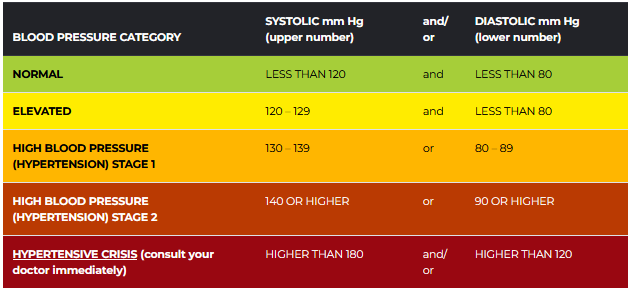

Sumber: https://www.heart.org/en/health-topics/high-blood-pressure/understanding-blood-pressure-readings

sumber:

In [ ]:
def map_blood_pressure(systolic, relaxation):
    if (systolic < 120) and (relaxation < 80):
        return 1  # Normal
    elif (systolic >= 120 and systolic <= 129) and (relaxation < 80):
        return 2  # Elevated
    elif (systolic >= 130 and systolic <= 139) or (relaxation >= 80 and relaxation <= 89):
        return 3  # High Stage 1
    elif (systolic >= 180) or (relaxation >= 120):
        return 5  # Hypertensive Crisis
    elif (systolic >= 140) or (relaxation >= 90):
        return 4  # High Stage 2
    else:
        return None  # Atau nilai lain untuk kasus di luar kondisi di atas

# Menerapkan fungsi ke setiap baris DataFrame
df_train['BloodPressure'] = df_train.apply(lambda row: map_blood_pressure(row['systolic'], row['relaxation']), axis=1)


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111479 entries, 17406 to 121958
Data columns (total 32 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   age                  111479 non-null  int64  
 1   height(cm)           111479 non-null  int64  
 2   weight(kg)           111479 non-null  int64  
 3   eyesight(left)       111479 non-null  float64
 4   eyesight(right)      111479 non-null  float64
 5   hearing(left)        111479 non-null  int64  
 6   hearing(right)       111479 non-null  int64  
 7   systolic             111479 non-null  int64  
 8   relaxation           111479 non-null  int64  
 9   fasting blood sugar  111479 non-null  int64  
 10  Cholesterol          111479 non-null  int64  
 11  triglyceride         111479 non-null  int64  
 12  HDL                  111479 non-null  int64  
 13  LDL                  111479 non-null  int64  
 14  hemoglobin           111479 non-null  float64
 15  Urine protein     

In [ ]:

# Menghitung jumlah perokok untuk setiap kelompok Bloos pressure
smoker_by_BloodPressure = df_train.groupby('BloodPressure')['smoking'].sum()

# Menghitung total jumlah orang untuk setiap kelompok BloodPressure
total_by_BloodPressure = df_train['BloodPressure'].value_counts()

# Menghitung persentase perokok untuk setiap kelompok blood Pressure
percentage_smoker_byBloodPressure = (smoker_by_BloodPressure / total_by_BloodPressure)

percentage_smoker_byBloodPressure

,0
BloodPressure,
1,0.389854
2,0.418176
3,0.489209
4,0.402502
5,0.486486


Info:
1. peluang seseorang merokok relatif lebih banyak dengan kategori Tekanan darah 3 hingga 4

In [ ]:
# Membuat dictionary mapping usia ke persentase perokok
percentage_map_2 = percentage_smoker_byBloodPressure.to_dict()

In [ ]:
# Membuat kolom baru 'percentage_smokers' berdasarkan nilai di kolom 'BloodPressure'
df_train['%smoker_BloodPressure'] = df_train['BloodPressure'].map(percentage_map_2)

df_train.head()

,age,height(cm),weight(kg),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking,age_catg,%smoker_age,BMI,BMI_catg,%smoker_BMI_catg,ESL_catg,%ESL,ESR_catg,%ESR,BloodPressure,%smoker_BloodPressure
17406,45,165,70,1.0,0.8,1,1,136,89,84,172,190,41,93,14.7,1,1.1,24,36,72,1,1,2,0.445347,25.711662,3,0.513931,2,0.435582,2,0.449733,3,0.489209
61303,50,160,60,1.0,1.2,1,1,117,76,109,205,59,77,116,14.7,1,0.9,34,25,95,0,1,2,0.445347,23.437500,2,0.386043,2,0.435582,2,0.449733,1,0.389854
71781,40,160,50,0.9,0.7,1,1,94,61,94,186,145,62,95,13.3,1,0.6,17,14,15,0,1,2,0.445347,19.531250,2,0.386043,2,0.435582,1,0.319607,1,0.389854
67014,60,155,55,0.9,1.0,1,1,100,66,84,167,59,61,95,12.9,1,0.7,38,27,21,0,0,3,0.310630,22.892820,2,0.386043,2,0.435582,2,0.449733,1,0.389854
73322,60,155,55,0.7,1.0,2,2,136,86,99,171,110,46,104,14.0,1,0.5,25,15,13,0,0,3,0.310630,22.892820,2,0.386043,2,0.435582,2,0.449733,3,0.489209


## Fasting Blood Sugar

**Standar Gula Darah Puasa**

*   Normal: 70 - 100
*   PraDiabet: 101 - 125
* Diabet: > 126

Sumber: https://www-who-int.translate.goog/data/gho/indicator-metadata-registry/imr-details/2380?_x_tr_sl=en&_x_tr_tl=id&_x_tr_hl=id&_x_tr_pto=tc

In [ ]:
B_sugar = df_train['fasting blood sugar'].value_counts().sort_values(ascending = False)
B_sugar

,count
fasting blood sugar,
94,4964
97,4752
92,4652
95,4615
93,4564
...,...
46,1
303,1
288,1


In [ ]:
#grouping gula darah berdasarkan standar yg jelas
def BS_catg(fasting_blood_sugar):
    if fasting_blood_sugar <= 100 :
        return 1 # normal
    elif 100 < fasting_blood_sugar <= 125:
        return 2 # pradiabet
    elif fasting_blood_sugar  >= 126:
        return 3 # diabetes

df_train['BS_catg'] = df_train['fasting blood sugar'].map(BS_catg)

df_train.head(3)


,age,height(cm),weight(kg),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking,age_catg,%smoker_age,BMI,BMI_catg,%smoker_BMI_catg,ESL_catg,%ESL,ESR_catg,%ESR,BloodPressure,%smoker_BloodPressure,BS_catg
17406,45,165,70,1.0,0.8,1,1,136,89,84,172,190,41,93,14.7,1,1.1,24,36,72,1,1,2,0.445347,25.711662,3,0.513931,2,0.435582,2,0.449733,3,0.489209,1
61303,50,160,60,1.0,1.2,1,1,117,76,109,205,59,77,116,14.7,1,0.9,34,25,95,0,1,2,0.445347,23.437500,2,0.386043,2,0.435582,2,0.449733,1,0.389854,2
71781,40,160,50,0.9,0.7,1,1,94,61,94,186,145,62,95,13.3,1,0.6,17,14,15,0,1,2,0.445347,19.531250,2,0.386043,2,0.435582,1,0.319607,1,0.389854,1


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111479 entries, 17406 to 121958
Data columns (total 34 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   age                    111479 non-null  int64  
 1   height(cm)             111479 non-null  int64  
 2   weight(kg)             111479 non-null  int64  
 3   eyesight(left)         111479 non-null  float64
 4   eyesight(right)        111479 non-null  float64
 5   hearing(left)          111479 non-null  int64  
 6   hearing(right)         111479 non-null  int64  
 7   systolic               111479 non-null  int64  
 8   relaxation             111479 non-null  int64  
 9   fasting blood sugar    111479 non-null  int64  
 10  Cholesterol            111479 non-null  int64  
 11  triglyceride           111479 non-null  int64  
 12  HDL                    111479 non-null  int64  
 13  LDL                    111479 non-null  int64  
 14  hemoglobin             111479 non-nul

In [ ]:
smoker_per_BS_catg = df_train.groupby('BS_catg')['smoking'].sum()
smoker_per_BS_catg

,smoking
BS_catg,
1,30046
2,16233
3,2283


In [ ]:
# Menghitung total jumlah orang untuk setiap kelompok BloodPressure
total_by_BS_catg = df_train['BS_catg'].value_counts()
total_by_BS_catg

,count
BS_catg,
1,74575
2,32703
3,4201


In [ ]:
# Menghitung persentase perokok untuk setiap kelompok blood Pressure
percentage_smoker_by_BS_catg = (smoker_per_BS_catg / total_by_BS_catg)

percentage_smoker_by_BS_catg

,0
BS_catg,
1,0.402896
2,0.496376
3,0.543442


Info:
1. Orang yang merokok berpeluang lebih besar berada pada kelompok orang dengan kadar gula darah yang lebih tinggi.

In [ ]:
# Membuat dictionary mapping Blood Sugar Category ke persentase perokok dalam kelompok tersebut
percentage_map_3 = percentage_smoker_by_BS_catg.to_dict()

In [ ]:
# Membuat kolom baru 'percentage_smokers' berdasarkan nilai di kolom 'BloodPressure'
df_train['%smoker_BS_catg'] = df_train['BS_catg'].map(percentage_map_3)

df_train.head()

,age,height(cm),weight(kg),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking,age_catg,%smoker_age,BMI,BMI_catg,%smoker_BMI_catg,ESL_catg,%ESL,ESR_catg,%ESR,BloodPressure,%smoker_BloodPressure,BS_catg,%smoker_BS_catg
17406,45,165,70,1.0,0.8,1,1,136,89,84,172,190,41,93,14.7,1,1.1,24,36,72,1,1,2,0.445347,25.711662,3,0.513931,2,0.435582,2,0.449733,3,0.489209,1,0.402896
61303,50,160,60,1.0,1.2,1,1,117,76,109,205,59,77,116,14.7,1,0.9,34,25,95,0,1,2,0.445347,23.437500,2,0.386043,2,0.435582,2,0.449733,1,0.389854,2,0.496376
71781,40,160,50,0.9,0.7,1,1,94,61,94,186,145,62,95,13.3,1,0.6,17,14,15,0,1,2,0.445347,19.531250,2,0.386043,2,0.435582,1,0.319607,1,0.389854,1,0.402896
67014,60,155,55,0.9,1.0,1,1,100,66,84,167,59,61,95,12.9,1,0.7,38,27,21,0,0,3,0.310630,22.892820,2,0.386043,2,0.435582,2,0.449733,1,0.389854,1,0.402896
73322,60,155,55,0.7,1.0,2,2,136,86,99,171,110,46,104,14.0,1,0.5,25,15,13,0,0,3,0.310630,22.892820,2,0.386043,2,0.435582,2,0.449733,3,0.489209,1,0.402896


## Cholesterol (Cholesterol total, HDL, LDL, Trigliserida)


Meroko dapat mengakibatkan:
1. HDL (High dencity Lipoprotein / kolesterol baik) menurun.
2. LDL (Low Dencity Lipoprotein / kolesterol jahat) meningkat.
3. Trigliserida (kolesterol lainnya) meningkat.

### Cholesterol

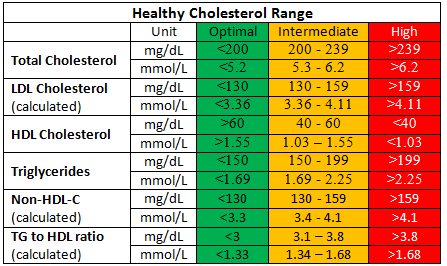

Sumber: https://healthy-ojas.com/cholesterol/healthy-cholesterol-level.html

In [ ]:
kolesterol = df_train['Cholesterol'].value_counts().sort_values(ascending=False)
kolesterol


,count
Cholesterol,
197,1585
198,1571
216,1520
201,1505
204,1505
...,...
99,1
351,1
393,1


In [ ]:
def chol(Cholesterol):
    if Cholesterol < 200:
        return 1 # Optimal
    elif 200 <= Cholesterol <= 239:
        return 2 # Intermediate
    elif Cholesterol > 239:
        return 3 # High

df_train['chol_catg'] = df_train['Cholesterol'].apply(chol)
df_train.head()


,age,height(cm),weight(kg),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking,age_catg,%smoker_age,BMI,BMI_catg,%smoker_BMI_catg,ESL_catg,%ESL,ESR_catg,%ESR,BloodPressure,%smoker_BloodPressure,BS_catg,%smoker_BS_catg,chol_catg
17406,45,165,70,1.0,0.8,1,1,136,89,84,172,190,41,93,14.7,1,1.1,24,36,72,1,1,2,0.445347,25.711662,3,0.513931,2,0.435582,2,0.449733,3,0.489209,1,0.402896,1
61303,50,160,60,1.0,1.2,1,1,117,76,109,205,59,77,116,14.7,1,0.9,34,25,95,0,1,2,0.445347,23.437500,2,0.386043,2,0.435582,2,0.449733,1,0.389854,2,0.496376,2
71781,40,160,50,0.9,0.7,1,1,94,61,94,186,145,62,95,13.3,1,0.6,17,14,15,0,1,2,0.445347,19.531250,2,0.386043,2,0.435582,1,0.319607,1,0.389854,1,0.402896,1
67014,60,155,55,0.9,1.0,1,1,100,66,84,167,59,61,95,12.9,1,0.7,38,27,21,0,0,3,0.310630,22.892820,2,0.386043,2,0.435582,2,0.449733,1,0.389854,1,0.402896,1
73322,60,155,55,0.7,1.0,2,2,136,86,99,171,110,46,104,14.0,1,0.5,25,15,13,0,0,3,0.310630,22.892820,2,0.386043,2,0.435582,2,0.449733,3,0.489209,1,0.402896,1


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111479 entries, 17406 to 121958
Data columns (total 36 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   age                    111479 non-null  int64  
 1   height(cm)             111479 non-null  int64  
 2   weight(kg)             111479 non-null  int64  
 3   eyesight(left)         111479 non-null  float64
 4   eyesight(right)        111479 non-null  float64
 5   hearing(left)          111479 non-null  int64  
 6   hearing(right)         111479 non-null  int64  
 7   systolic               111479 non-null  int64  
 8   relaxation             111479 non-null  int64  
 9   fasting blood sugar    111479 non-null  int64  
 10  Cholesterol            111479 non-null  int64  
 11  triglyceride           111479 non-null  int64  
 12  HDL                    111479 non-null  int64  
 13  LDL                    111479 non-null  int64  
 14  hemoglobin             111479 non-nul

In [ ]:
# Jumlah perokok per kategori kolesterol
smoker_per_chol_catg = df_train.groupby('chol_catg')['smoking'].sum()
smoker_per_chol_catg

,smoking
chol_catg,
1,27532
2,19050
3,1980


In [ ]:
total_per_chol_catg = df_train['chol_catg'].value_counts()
total_per_chol_catg

,count
chol_catg,
1,60527
2,45094
3,5858


In [ ]:
# Menghitung % perokok untuk setiap kategori Cholesterol
percentage_smoker_by_chol_catg = (smoker_per_chol_catg / total_per_chol_catg)

percentage_smoker_by_chol_catg

,0
chol_catg,
1,0.454871
2,0.422451
3,0.337999


In [ ]:
# Membuat dictionary mapping Cholesterol Category ke persentase perokok dalam kelompok tersebut
percentage_map_4 = percentage_smoker_by_chol_catg.to_dict()

In [ ]:
df_train['%smoker_chol_catg'] = df_train['chol_catg'].map(percentage_map_4)
df_train.head(3)

,age,height(cm),weight(kg),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking,age_catg,%smoker_age,BMI,BMI_catg,%smoker_BMI_catg,ESL_catg,%ESL,ESR_catg,%ESR,BloodPressure,%smoker_BloodPressure,BS_catg,%smoker_BS_catg,chol_catg,%smoker_chol_catg
17406,45,165,70,1.0,0.8,1,1,136,89,84,172,190,41,93,14.7,1,1.1,24,36,72,1,1,2,0.445347,25.711662,3,0.513931,2,0.435582,2,0.449733,3,0.489209,1,0.402896,1,0.454871
61303,50,160,60,1.0,1.2,1,1,117,76,109,205,59,77,116,14.7,1,0.9,34,25,95,0,1,2,0.445347,23.437500,2,0.386043,2,0.435582,2,0.449733,1,0.389854,2,0.496376,2,0.422451
71781,40,160,50,0.9,0.7,1,1,94,61,94,186,145,62,95,13.3,1,0.6,17,14,15,0,1,2,0.445347,19.531250,2,0.386043,2,0.435582,1,0.319607,1,0.389854,1,0.402896,1,0.454871


### HDL (Kolesterol baik)

In [ ]:
def HDL(HDL):
    if HDL < 40:
        return 1 # Rendah
    elif 40 <= HDL <= 59:
        return 2 # Intermediate
    elif HDL > 59:
        return 3 # Optimal

df_train['HDL_catg'] = df_train['HDL'].apply(HDL)
df_train.head()

,age,height(cm),weight(kg),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking,age_catg,%smoker_age,BMI,BMI_catg,%smoker_BMI_catg,ESL_catg,%ESL,ESR_catg,%ESR,BloodPressure,%smoker_BloodPressure,BS_catg,%smoker_BS_catg,chol_catg,%smoker_chol_catg,HDL_catg
17406,45,165,70,1.0,0.8,1,1,136,89,84,172,190,41,93,14.7,1,1.1,24,36,72,1,1,2,0.445347,25.711662,3,0.513931,2,0.435582,2,0.449733,3,0.489209,1,0.402896,1,0.454871,2
61303,50,160,60,1.0,1.2,1,1,117,76,109,205,59,77,116,14.7,1,0.9,34,25,95,0,1,2,0.445347,23.437500,2,0.386043,2,0.435582,2,0.449733,1,0.389854,2,0.496376,2,0.422451,3
71781,40,160,50,0.9,0.7,1,1,94,61,94,186,145,62,95,13.3,1,0.6,17,14,15,0,1,2,0.445347,19.531250,2,0.386043,2,0.435582,1,0.319607,1,0.389854,1,0.402896,1,0.454871,3
67014,60,155,55,0.9,1.0,1,1,100,66,84,167,59,61,95,12.9,1,0.7,38,27,21,0,0,3,0.310630,22.892820,2,0.386043,2,0.435582,2,0.449733,1,0.389854,1,0.402896,1,0.454871,3
73322,60,155,55,0.7,1.0,2,2,136,86,99,171,110,46,104,14.0,1,0.5,25,15,13,0,0,3,0.310630,22.892820,2,0.386043,2,0.435582,2,0.449733,3,0.489209,1,0.402896,1,0.454871,2


In [ ]:
# hitung julah perokok untuk setiap kategori HDL
smoker_per_HDL_catg = df_train.groupby('HDL_catg')['smoking'].sum()
smoker_per_HDL_catg

,smoking
HDL_catg,
1,6537
2,31492
3,10533


In [ ]:
#menghitung total orang untuk setiap kategori HDL
total_per_HDL_catg = df_train['HDL_catg'].value_counts()
total_per_HDL_catg

,count
HDL_catg,
2,62678
3,38536
1,10265


In [ ]:
# % setiap perokok disetiap kelompok HDL
percentage_smoker_by_HDL_catg = (smoker_per_HDL_catg / total_per_HDL_catg)

percentage_smoker_by_HDL_catg

,0
HDL_catg,
1,0.636824
2,0.502441
3,0.273329


Info:
1. perokok cenderung berada lebih banyak pada kelompok orang ber-HDL rendah (berisiko serangan jantung)

In [ ]:
# Buat dictionary % HDL Category
percentage_map_5 = percentage_smoker_by_HDL_catg.to_dict()

df_train['%smoker_HDL_catg'] = df_train['HDL_catg'].map(percentage_map_5)
df_train.head(3)

,age,height(cm),weight(kg),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking,age_catg,%smoker_age,BMI,BMI_catg,%smoker_BMI_catg,ESL_catg,%ESL,ESR_catg,%ESR,BloodPressure,%smoker_BloodPressure,BS_catg,%smoker_BS_catg,chol_catg,%smoker_chol_catg,HDL_catg,%smoker_HDL_catg
17406,45,165,70,1.0,0.8,1,1,136,89,84,172,190,41,93,14.7,1,1.1,24,36,72,1,1,2,0.445347,25.711662,3,0.513931,2,0.435582,2,0.449733,3,0.489209,1,0.402896,1,0.454871,2,0.502441
61303,50,160,60,1.0,1.2,1,1,117,76,109,205,59,77,116,14.7,1,0.9,34,25,95,0,1,2,0.445347,23.437500,2,0.386043,2,0.435582,2,0.449733,1,0.389854,2,0.496376,2,0.422451,3,0.273329
71781,40,160,50,0.9,0.7,1,1,94,61,94,186,145,62,95,13.3,1,0.6,17,14,15,0,1,2,0.445347,19.531250,2,0.386043,2,0.435582,1,0.319607,1,0.389854,1,0.402896,1,0.454871,3,0.273329


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111479 entries, 17406 to 121958
Data columns (total 39 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   age                    111479 non-null  int64  
 1   height(cm)             111479 non-null  int64  
 2   weight(kg)             111479 non-null  int64  
 3   eyesight(left)         111479 non-null  float64
 4   eyesight(right)        111479 non-null  float64
 5   hearing(left)          111479 non-null  int64  
 6   hearing(right)         111479 non-null  int64  
 7   systolic               111479 non-null  int64  
 8   relaxation             111479 non-null  int64  
 9   fasting blood sugar    111479 non-null  int64  
 10  Cholesterol            111479 non-null  int64  
 11  triglyceride           111479 non-null  int64  
 12  HDL                    111479 non-null  int64  
 13  LDL                    111479 non-null  int64  
 14  hemoglobin             111479 non-nul

### LDL (Kolesterol Jahat)

In [ ]:
min_LDL = df_train['LDL'].min()
min_LDL

1

In [ ]:
max_LDL = df_train['LDL'].max()
max_LDL

1660

In [ ]:
LDL_value_array = df_train['LDL'].unique()
LDL_value_series = pd.Series(LDL_value_array)
LDL_value_sorted_desc = LDL_value_series.sort_values(ascending=False)

print("Nilai Unik LDL (Descending - Pandas Series):")
print(LDL_value_sorted_desc)

Nilai Unik LDL (Descending - Pandas Series):
157    1660
187    1220
172    1200
211    1070
214    1010
       ... 
202      18
196      17
210      16
206      10
212       1
Length: 216, dtype: int64


In [ ]:
def LDL(LDL):
    if LDL < 100:
        return 1 # Optimal
    elif 100 <= LDL <= 129:
        return 2 # Intermediate
    elif 130 <= LDL <= 159:
        return 3 # Intermediate
    elif 160 <= LDL <= 189:
        return 4 # Intermediate
    elif LDL >= 190:
        return 5 # High

df_train['LDL_catg'] = df_train['LDL'].apply(LDL)
df_train

,age,height(cm),weight(kg),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking,age_catg,%smoker_age,BMI,BMI_catg,%smoker_BMI_catg,ESL_catg,%ESL,ESR_catg,%ESR,BloodPressure,%smoker_BloodPressure,BS_catg,%smoker_BS_catg,chol_catg,%smoker_chol_catg,HDL_catg,%smoker_HDL_catg,LDL_catg
17406,45,165,70,1.0,0.8,1,1,136,89,84,172,190,41,93,14.7,1,1.1,24,36,72,1,1,2,0.445347,25.711662,3,0.513931,2,0.435582,2,0.449733,3,0.489209,1,0.402896,1,0.454871,2,0.502441,1
61303,50,160,60,1.0,1.2,1,1,117,76,109,205,59,77,116,14.7,1,0.9,34,25,95,0,1,2,0.445347,23.437500,2,0.386043,2,0.435582,2,0.449733,1,0.389854,2,0.496376,2,0.422451,3,0.273329,2
71781,40,160,50,0.9,0.7,1,1,94,61,94,186,145,62,95,13.3,1,0.6,17,14,15,0,1,2,0.445347,19.531250,2,0.386043,2,0.435582,1,0.319607,1,0.389854,1,0.402896,1,0.454871,3,0.273329,1
67014,60,155,55,0.9,1.0,1,1,100,66,84,167,59,61,95,12.9,1,0.7,38,27,21,0,0,3,0.310630,22.892820,2,0.386043,2,0.435582,2,0.449733,1,0.389854,1,0.402896,1,0.454871,3,0.273329,1
73322,60,155,55,0.7,1.0,2,2,136,86,99,171,110,46,104,14.0,1,0.5,25,15,13,0,0,3,0.310630,22.892820,2,0.386043,2,0.435582,2,0.449733,3,0.489209,1,0.402896,1,0.454871,2,0.502441,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,30,180,80,1.2,1.2,1,1,110,80,97,225,204,42,143,15.3,1,1.0,41,87,65,0,1,1,0.575078,24.691358,2,0.386043,2,0.435582,2,0.449733,3,0.489209,1,0.402896,2,0.422451,2,0.502441,3
103694,40,165,65,1.5,1.2,1,1,143,95,96,169,156,48,90,15.9,1,0.9,24,26,53,1,1,2,0.445347,23.875115,2,0.386043,3,0.538230,2,0.449733,4,0.402502,1,0.402896,1,0.454871,2,0.502441,1
131932,45,160,60,1.0,1.0,1,1,100,62,88,166,93,74,74,13.8,1,0.6,21,13,14,0,1,2,0.445347,23.437500,2,0.386043,2,0.435582,2,0.449733,1,0.389854,1,0.402896,1,0.454871,3,0.273329,1
146867,60,170,85,1.2,1.5,1,1,135,81,87,175,86,42,116,15.0,1,1.0,33,53,40,0,0,3,0.310630,29.411765,3,0.513931,2,0.435582,3,0.542174,3,0.489209,1,0.402896,1,0.454871,2,0.502441,2


In [ ]:
smoker_per_LDL_catg = df_train.groupby('LDL_catg')['smoking'].sum()
smoker_per_LDL_catg

,smoking
LDL_catg,
1,15816
2,20521
3,10833
4,1276
5,116


In [ ]:
total_per_LDL_catg = df_train['LDL_catg'].value_counts()
total_per_LDL_catg

,count
LDL_catg,
2,44430
1,34162
3,28471
4,4087
5,329


In [ ]:
percentage_smoker_by_LDL_catg = (smoker_per_LDL_catg / total_per_LDL_catg)

percentage_smoker_by_LDL_catg

,0
LDL_catg,
1,0.462971
2,0.461873
3,0.380492
4,0.312209
5,0.352584


In [ ]:
percentage_map_6 = percentage_smoker_by_LDL_catg.to_dict()

df_train['%smoker_LDL_catg'] = df_train['LDL_catg'].map(percentage_map_6)
df_train.head(3)


,age,height(cm),weight(kg),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking,age_catg,%smoker_age,BMI,BMI_catg,%smoker_BMI_catg,ESL_catg,%ESL,ESR_catg,%ESR,BloodPressure,%smoker_BloodPressure,BS_catg,%smoker_BS_catg,chol_catg,%smoker_chol_catg,HDL_catg,%smoker_HDL_catg,LDL_catg,%smoker_LDL_catg
17406,45,165,70,1.0,0.8,1,1,136,89,84,172,190,41,93,14.7,1,1.1,24,36,72,1,1,2,0.445347,25.711662,3,0.513931,2,0.435582,2,0.449733,3,0.489209,1,0.402896,1,0.454871,2,0.502441,1,0.462971
61303,50,160,60,1.0,1.2,1,1,117,76,109,205,59,77,116,14.7,1,0.9,34,25,95,0,1,2,0.445347,23.437500,2,0.386043,2,0.435582,2,0.449733,1,0.389854,2,0.496376,2,0.422451,3,0.273329,2,0.461873
71781,40,160,50,0.9,0.7,1,1,94,61,94,186,145,62,95,13.3,1,0.6,17,14,15,0,1,2,0.445347,19.531250,2,0.386043,2,0.435582,1,0.319607,1,0.389854,1,0.402896,1,0.454871,3,0.273329,1,0.462971


### Triglyceride

In [ ]:
def tri(triglyceride):
    if triglyceride < 150:
        return 1 # Optimal
    elif 150 <= triglyceride <= 199:
        return 2 # Intermediate
    elif 199 < triglyceride:
        return 3 # High

df_train['tri_catg'] = df_train['triglyceride'].apply(tri)
df_train.head(3)

,age,height(cm),weight(kg),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking,age_catg,%smoker_age,BMI,BMI_catg,%smoker_BMI_catg,ESL_catg,%ESL,ESR_catg,%ESR,BloodPressure,%smoker_BloodPressure,BS_catg,%smoker_BS_catg,chol_catg,%smoker_chol_catg,HDL_catg,%smoker_HDL_catg,LDL_catg,%smoker_LDL_catg,tri_catg
17406,45,165,70,1.0,0.8,1,1,136,89,84,172,190,41,93,14.7,1,1.1,24,36,72,1,1,2,0.445347,25.711662,3,0.513931,2,0.435582,2,0.449733,3,0.489209,1,0.402896,1,0.454871,2,0.502441,1,0.462971,2
61303,50,160,60,1.0,1.2,1,1,117,76,109,205,59,77,116,14.7,1,0.9,34,25,95,0,1,2,0.445347,23.437500,2,0.386043,2,0.435582,2,0.449733,1,0.389854,2,0.496376,2,0.422451,3,0.273329,2,0.461873,1
71781,40,160,50,0.9,0.7,1,1,94,61,94,186,145,62,95,13.3,1,0.6,17,14,15,0,1,2,0.445347,19.531250,2,0.386043,2,0.435582,1,0.319607,1,0.389854,1,0.402896,1,0.454871,3,0.273329,1,0.462971,1


In [ ]:
# perokok per kelompok kategori triglicarida
smoker_per_tri_catg = df_train.groupby('tri_catg')['smoking'].sum()
smoker_per_tri_catg

,smoking
tri_catg,
1,25925
2,11967
3,10670


In [ ]:
#total per kategori tri
total_per_tri_catg = df_train['tri_catg'].value_counts()
total_per_tri_catg

,count
tri_catg,
1,75030
2,21041
3,15408


In [ ]:
# % perokok per kelompok tri
percentage_smoker_by_tri_catg = (smoker_per_tri_catg / total_per_tri_catg)
percentage_smoker_by_tri_catg

,0
tri_catg,
1,0.345528
2,0.568747
3,0.692497


Info:
1. perokok lebih banyak berada pada kelompok dengan kandungan trigliserida yang lebih tinggi

In [ ]:
percentage_map_7 = percentage_smoker_by_tri_catg.to_dict()

df_train['%smoker_tri_catg'] = df_train['tri_catg'].map(percentage_map_7)
df_train.head(3)

,age,height(cm),weight(kg),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking,age_catg,%smoker_age,BMI,BMI_catg,%smoker_BMI_catg,ESL_catg,%ESL,ESR_catg,%ESR,BloodPressure,%smoker_BloodPressure,BS_catg,%smoker_BS_catg,chol_catg,%smoker_chol_catg,HDL_catg,%smoker_HDL_catg,LDL_catg,%smoker_LDL_catg,tri_catg,%smoker_tri_catg
17406,45,165,70,1.0,0.8,1,1,136,89,84,172,190,41,93,14.7,1,1.1,24,36,72,1,1,2,0.445347,25.711662,3,0.513931,2,0.435582,2,0.449733,3,0.489209,1,0.402896,1,0.454871,2,0.502441,1,0.462971,2,0.568747
61303,50,160,60,1.0,1.2,1,1,117,76,109,205,59,77,116,14.7,1,0.9,34,25,95,0,1,2,0.445347,23.437500,2,0.386043,2,0.435582,2,0.449733,1,0.389854,2,0.496376,2,0.422451,3,0.273329,2,0.461873,1,0.345528
71781,40,160,50,0.9,0.7,1,1,94,61,94,186,145,62,95,13.3,1,0.6,17,14,15,0,1,2,0.445347,19.531250,2,0.386043,2,0.435582,1,0.319607,1,0.389854,1,0.402896,1,0.454871,3,0.273329,1,0.462971,1,0.345528


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111479 entries, 17406 to 121958
Data columns (total 43 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   age                    111479 non-null  int64  
 1   height(cm)             111479 non-null  int64  
 2   weight(kg)             111479 non-null  int64  
 3   eyesight(left)         111479 non-null  float64
 4   eyesight(right)        111479 non-null  float64
 5   hearing(left)          111479 non-null  int64  
 6   hearing(right)         111479 non-null  int64  
 7   systolic               111479 non-null  int64  
 8   relaxation             111479 non-null  int64  
 9   fasting blood sugar    111479 non-null  int64  
 10  Cholesterol            111479 non-null  int64  
 11  triglyceride           111479 non-null  int64  
 12  HDL                    111479 non-null  int64  
 13  LDL                    111479 non-null  int64  
 14  hemoglobin             111479 non-nul

### Hemoglobin

Merokok memiliki pengaruh yang kompleks terhadap kadar hemoglobin, dan cenderung menyebabkan peningkatan kadar hemoglobin dalam darah. Berikut penjelasannya:

1. **Peningkatan CO** (Karbon Monoksida): Asap rokok mengandung karbon monoksida (CO). CO memiliki afinitas yang jauh lebih tinggi terhadap hemoglobin dibandingkan oksigen. Ketika seseorang merokok, CO akan berikatan dengan hemoglobin, membentuk karboksihemoglobin (COHb).

2. **Penurunan Oksigen dalam Darah** (Hipoksia): Pembentukan COHb mengurangi jumlah hemoglobin yang tersedia untuk mengangkut oksigen ke seluruh tubuh, menyebabkan kondisi hipoksia (kekurangan oksigen) pada tingkat jaringan.

3. Respons Kompensasi Tubuh: Sebagai respons terhadap hipoksia kronis akibat merokok, **tubuh akan memproduksi lebih banyak sel darah merah** dan hemoglobin untuk meningkatkan kapasitas pengangkutan oksigen. Kondisi ini dikenal sebagai polisitemia sekunder

In [ ]:
# lihat nilai min dan max data hemoglobin
min_hemo = df_train['hemoglobin'].min()
min_hemo

5.8

In [ ]:
max_hemo = df_train['hemoglobin'].max()
max_hemo

20.4

Karena tidak adaketerangan jenis kelamin, maka kita asumsikan semua data adalah laki2.

Standar kadar hemoglobin untuk laki2 dewasa adalah 14 - 18 g/dl

Sumber: https://www.ncbi.nlm.nih.gov/books/NBK259/

In [ ]:
def hemo(hemoglobin):
    if hemoglobin < 14:
        return 1 # Rendah
    elif 14 <= hemoglobin <= 18:
        return 2 #normal
    elif hemoglobin > 18:
        return 3 #tinggi

df_train['hemo_catg'] = df_train['hemoglobin'].apply(hemo)
df_train.head()
#

,age,height(cm),weight(kg),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking,age_catg,%smoker_age,BMI,BMI_catg,%smoker_BMI_catg,ESL_catg,%ESL,ESR_catg,%ESR,BloodPressure,%smoker_BloodPressure,BS_catg,%smoker_BS_catg,chol_catg,%smoker_chol_catg,HDL_catg,%smoker_HDL_catg,LDL_catg,%smoker_LDL_catg,tri_catg,%smoker_tri_catg,hemo_catg
17406,45,165,70,1.0,0.8,1,1,136,89,84,172,190,41,93,14.7,1,1.1,24,36,72,1,1,2,0.445347,25.711662,3,0.513931,2,0.435582,2,0.449733,3,0.489209,1,0.402896,1,0.454871,2,0.502441,1,0.462971,2,0.568747,2
61303,50,160,60,1.0,1.2,1,1,117,76,109,205,59,77,116,14.7,1,0.9,34,25,95,0,1,2,0.445347,23.437500,2,0.386043,2,0.435582,2,0.449733,1,0.389854,2,0.496376,2,0.422451,3,0.273329,2,0.461873,1,0.345528,2
71781,40,160,50,0.9,0.7,1,1,94,61,94,186,145,62,95,13.3,1,0.6,17,14,15,0,1,2,0.445347,19.531250,2,0.386043,2,0.435582,1,0.319607,1,0.389854,1,0.402896,1,0.454871,3,0.273329,1,0.462971,1,0.345528,1
67014,60,155,55,0.9,1.0,1,1,100,66,84,167,59,61,95,12.9,1,0.7,38,27,21,0,0,3,0.310630,22.892820,2,0.386043,2,0.435582,2,0.449733,1,0.389854,1,0.402896,1,0.454871,3,0.273329,1,0.462971,1,0.345528,1
73322,60,155,55,0.7,1.0,2,2,136,86,99,171,110,46,104,14.0,1,0.5,25,15,13,0,0,3,0.310630,22.892820,2,0.386043,2,0.435582,2,0.449733,3,0.489209,1,0.402896,1,0.454871,2,0.502441,2,0.461873,1,0.345528,2


In [ ]:
smoker_per_hemo_catg = df_train.groupby('hemo_catg')['smoking'].sum()
smoker_per_hemo_catg

,smoking
hemo_catg,
1,2707
2,45624
3,231


In [ ]:
total_per_hemo_catg = df_train['hemo_catg'].value_counts()
total_per_hemo_catg

,count
hemo_catg,
2,80412
1,30788
3,279


In [ ]:
percentage_map_8 = (smoker_per_hemo_catg/total_per_hemo_catg)

In [ ]:
percentage_map_8

,0
hemo_catg,
1,0.087924
2,0.567378
3,0.827957


Info:
1. aktivitas merokok berkaitan dengan peningkatan kadar hemoglobin dalam darah.

In [ ]:
percentage_map_8 = percentage_map_8.to_dict()

In [ ]:
df_train['%smoker_hemo_catg'] = df_train['hemo_catg'].map(percentage_map_8)

In [ ]:
df_train.head()

,age,height(cm),weight(kg),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking,age_catg,%smoker_age,BMI,BMI_catg,%smoker_BMI_catg,ESL_catg,%ESL,ESR_catg,%ESR,BloodPressure,%smoker_BloodPressure,BS_catg,%smoker_BS_catg,chol_catg,%smoker_chol_catg,HDL_catg,%smoker_HDL_catg,LDL_catg,%smoker_LDL_catg,tri_catg,%smoker_tri_catg,hemo_catg,%smoker_hemo_catg
17406,45,165,70,1.0,0.8,1,1,136,89,84,172,190,41,93,14.7,1,1.1,24,36,72,1,1,2,0.445347,25.711662,3,0.513931,2,0.435582,2,0.449733,3,0.489209,1,0.402896,1,0.454871,2,0.502441,1,0.462971,2,0.568747,2,0.567378
61303,50,160,60,1.0,1.2,1,1,117,76,109,205,59,77,116,14.7,1,0.9,34,25,95,0,1,2,0.445347,23.437500,2,0.386043,2,0.435582,2,0.449733,1,0.389854,2,0.496376,2,0.422451,3,0.273329,2,0.461873,1,0.345528,2,0.567378
71781,40,160,50,0.9,0.7,1,1,94,61,94,186,145,62,95,13.3,1,0.6,17,14,15,0,1,2,0.445347,19.531250,2,0.386043,2,0.435582,1,0.319607,1,0.389854,1,0.402896,1,0.454871,3,0.273329,1,0.462971,1,0.345528,1,0.087924
67014,60,155,55,0.9,1.0,1,1,100,66,84,167,59,61,95,12.9,1,0.7,38,27,21,0,0,3,0.310630,22.892820,2,0.386043,2,0.435582,2,0.449733,1,0.389854,1,0.402896,1,0.454871,3,0.273329,1,0.462971,1,0.345528,1,0.087924
73322,60,155,55,0.7,1.0,2,2,136,86,99,171,110,46,104,14.0,1,0.5,25,15,13,0,0,3,0.310630,22.892820,2,0.386043,2,0.435582,2,0.449733,3,0.489209,1,0.402896,1,0.454871,2,0.502441,2,0.461873,1,0.345528,2,0.567378


## Urin Protein
Merokok secara signifikan meningkatkan risiko proteinuria dan kerusakan ginjal melalui berbagai mekanisme, termasuk kerusakan pembuluh darah, peningkatan tekanan darah, peradangan, dan kerusakan langsung pada glomeruli.

In [ ]:
min_UP = df_train['Urine protein'].min()
min_UP

1

In [ ]:
max_UP = df_train['Urine protein'].max()
max_UP

6

In [ ]:
smoker_per_UP = df_train.groupby('Urine protein')['smoking'].sum()
smoker_per_UP

,smoking
Urine protein,
1,46413
2,1446
3,554
4,131
5,18
6,0


In [ ]:
total_per_UP = df_train['Urine protein'].value_counts()
total_per_UP

,count
Urine protein,
1,105555
2,4000
3,1549
4,319
5,51
6,5


In [ ]:
percentage_smoker_by_UP = (smoker_per_UP / total_per_UP)
percentage_smoker_by_UP

,0
Urine protein,
1,0.439704
2,0.361500
3,0.357650
4,0.410658
5,0.352941
6,0.000000


agar peningkatan peluang perokok sesuai dengan informasi medis bahwa merokok dapat meningkatkan kadar protein dalam urin, kita kelompokkan kadar 4, 5, dan 6 ke dalam 1 kelompok.

In [ ]:
def UP(Urine_protein):
    if 1 <= Urine_protein <= 4:
        return Urine_protein
    elif Urine_protein > 4:
        return 4

df_train['UP_1'] = df_train['Urine protein'].apply(UP)

In [ ]:
smoker_per_UP_1 = df_train.groupby('UP_1')['smoking'].sum()
smoker_per_UP_1

,smoking
UP_1,
1,46413
2,1446
3,554
4,149


In [ ]:
total_per_UP_1 = df_train['UP_1'].value_counts()
total_per_UP_1

,count
UP_1,
1,105555
2,4000
3,1549
4,375


In [ ]:
percentage_smoker_by_UP_1 = (smoker_per_UP_1/total_per_UP_1)
percentage_smoker_by_UP_1

,0
UP_1,
1,0.439704
2,0.361500
3,0.357650
4,0.397333


In [ ]:
percentage_map_9 = percentage_smoker_by_UP_1.to_dict()

In [ ]:
df_train['%smoker_UP_1'] = df_train['UP_1'].map(percentage_map_9)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111479 entries, 17406 to 121958
Data columns (total 47 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   age                    111479 non-null  int64  
 1   height(cm)             111479 non-null  int64  
 2   weight(kg)             111479 non-null  int64  
 3   eyesight(left)         111479 non-null  float64
 4   eyesight(right)        111479 non-null  float64
 5   hearing(left)          111479 non-null  int64  
 6   hearing(right)         111479 non-null  int64  
 7   systolic               111479 non-null  int64  
 8   relaxation             111479 non-null  int64  
 9   fasting blood sugar    111479 non-null  int64  
 10  Cholesterol            111479 non-null  int64  
 11  triglyceride           111479 non-null  int64  
 12  HDL                    111479 non-null  int64  
 13  LDL                    111479 non-null  int64  
 14  hemoglobin             111479 non-nul

## serum creatinine

Rendah: Di bawah 0.74 mg/dL
Normal: 0.74 - 1.35 mg/dL
Tinggi: Di atas 1.35 mg/dL

Sumber: https://www.mayoclinic.org/tests-procedures/creatinine-test/about/pac-20384646#:~:text=Serum%20creatinine%20level%20*%20For%20adult%20men%2C,to%201.04%20mg/dL%20(52.2%20to%2091.9%20mmol/L).

In [ ]:
smoker_per_SC = df_train.groupby('serum creatinine')['smoking'].sum()
smoker_per_SC

,smoking
serum creatinine,
0.1,9
0.2,0
0.3,1
0.4,9
0.5,117
0.6,669
0.7,2913
0.8,7831
0.9,13401


In [ ]:
def SC(serum_creatinine):
    if serum_creatinine < 0.75:
        return 1 # low
    elif 0.74 <= serum_creatinine <= 1.35:
        return 2 # normal
    elif serum_creatinine > 1.35:
        return 3 # high

df_train['SC_catg'] = df_train['serum creatinine'].apply(SC)

In [ ]:
# melihat jumlah perokok per SC category
smoker_per_SC_catg = df_train.groupby('SC_catg')['smoking'].sum()
smoker_per_SC_catg

,smoking
SC_catg,
1,3718
2,44618
3,226


In [ ]:
total_per_SC_catg = df_train['SC_catg'].value_counts()
total_per_SC_catg

,count
SC_catg,
2,87105
1,23763
3,611


In [ ]:
percentage_smoker_by_SC_catg = (smoker_per_SC_catg/total_per_SC_catg)
percentage_smoker_by_SC_catg

,0
SC_catg,
1,0.156462
2,0.512232
3,0.369885


In [ ]:
percentage_map_10 = percentage_smoker_by_SC_catg.to_dict()

In [ ]:
df_train['%smoker_SC'] = df_train['SC_catg'].map(percentage_map_10)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111479 entries, 17406 to 121958
Data columns (total 49 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   age                    111479 non-null  int64  
 1   height(cm)             111479 non-null  int64  
 2   weight(kg)             111479 non-null  int64  
 3   eyesight(left)         111479 non-null  float64
 4   eyesight(right)        111479 non-null  float64
 5   hearing(left)          111479 non-null  int64  
 6   hearing(right)         111479 non-null  int64  
 7   systolic               111479 non-null  int64  
 8   relaxation             111479 non-null  int64  
 9   fasting blood sugar    111479 non-null  int64  
 10  Cholesterol            111479 non-null  int64  
 11  triglyceride           111479 non-null  int64  
 12  HDL                    111479 non-null  int64  
 13  LDL                    111479 non-null  int64  
 14  hemoglobin             111479 non-nul

In [ ]:
#df_train.to_csv('/content/drive/MyDrive/2. Mechine Learning/Kelas ML/PROJECT/FINAL Project: Smoker Detector/df_train.csv')

In [ ]:
#df_train = pd.read_csv('/content/drive/MyDrive/2. Mechine Learning/Kelas ML/PROJECT/FINAL Project: Smoker Detector/df_train.csv')

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111479 entries, 17406 to 121958
Data columns (total 49 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   age                    111479 non-null  int64  
 1   height(cm)             111479 non-null  int64  
 2   weight(kg)             111479 non-null  int64  
 3   eyesight(left)         111479 non-null  float64
 4   eyesight(right)        111479 non-null  float64
 5   hearing(left)          111479 non-null  int64  
 6   hearing(right)         111479 non-null  int64  
 7   systolic               111479 non-null  int64  
 8   relaxation             111479 non-null  int64  
 9   fasting blood sugar    111479 non-null  int64  
 10  Cholesterol            111479 non-null  int64  
 11  triglyceride           111479 non-null  int64  
 12  HDL                    111479 non-null  int64  
 13  LDL                    111479 non-null  int64  
 14  hemoglobin             111479 non-nul

## AST
AST (Aspartate Aminotransferase), juga dikenal sebagai SGOT (Serum Glutamic-Oxaloacetic Transaminase), adalah **enzim yang terutama ditemukan di hati, jantung, otot, ginjal, dan otak**. Dalam jumlah kecil, AST biasanya hadir dalam darah. Namun, ketika sel-sel di organ-organ ini rusak, AST dapat bocor ke dalam aliran darah, menyebabkan peningkatan kadar AST dalam serum.

Peningkatan Kadar AST: Beberapa studi observasional menunjukkan bahwa perokok cenderung memiliki kadar AST serum yang sedikit lebih tinggi dibandingkan dengan bukan perokok.

Standart: 10 - 40 UI/L

Sumber: https://prestigeer.com/blog/read-interpret-liver-function-test/



In [ ]:
# min dan max
min_AST = df_train['AST'].min()
min_AST

6

In [ ]:
max_AST = df_train['AST'].max()
max_AST

656

In [ ]:
smoker_per_AST = df_train.groupby('AST')['smoking'].sum()
smoker_per_AST

,smoking
AST,
6,0
7,0
8,0
9,4
10,12
...,...
320,1
326,0
527,1


In [ ]:
def AST_func(AST):
    if AST < 10:
        return 1 # low
    elif 10 <= AST <= 40:
        return 2 # normal
    elif AST > 40:
        return 3 # high

df_train['AST_catg'] = df_train['AST'].apply(AST_func)

In [ ]:
smoker_per_AST_catg = df_train.groupby('AST_catg')['smoking'].sum()
smoker_per_AST_catg

,smoking
AST_catg,
1,4
2,45699
3,2859


In [ ]:
total_per_AST_catg  = df_train['AST_catg'].value_counts()
total_per_AST_catg

,count
AST_catg,
2,105739
3,5722
1,18


In [ ]:
percentage_smoker_by_AST_catg = (smoker_per_AST_catg/total_per_AST_catg)
percentage_smoker_by_AST_catg

,0
AST_catg,
1,0.222222
2,0.432187
3,0.499650


In [ ]:
percentage_map_11 = percentage_smoker_by_AST_catg.to_dict()

In [ ]:
df_train['%smoker_AST_catg'] = df_train['AST_catg'].map(percentage_map_11)

In [ ]:
df_train.head()

,age,height(cm),weight(kg),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking,age_catg,%smoker_age,BMI,BMI_catg,%smoker_BMI_catg,ESL_catg,%ESL,ESR_catg,%ESR,BloodPressure,%smoker_BloodPressure,BS_catg,%smoker_BS_catg,chol_catg,%smoker_chol_catg,HDL_catg,%smoker_HDL_catg,LDL_catg,%smoker_LDL_catg,tri_catg,%smoker_tri_catg,hemo_catg,%smoker_hemo_catg,UP_1,%smoker_UP_1,SC_catg,%smoker_SC,AST_catg,%smoker_AST_catg
17406,45,165,70,1.0,0.8,1,1,136,89,84,172,190,41,93,14.7,1,1.1,24,36,72,1,1,2,0.445347,25.711662,3,0.513931,2,0.435582,2,0.449733,3,0.489209,1,0.402896,1,0.454871,2,0.502441,1,0.462971,2,0.568747,2,0.567378,1,0.439704,2,0.512232,2,0.432187
61303,50,160,60,1.0,1.2,1,1,117,76,109,205,59,77,116,14.7,1,0.9,34,25,95,0,1,2,0.445347,23.437500,2,0.386043,2,0.435582,2,0.449733,1,0.389854,2,0.496376,2,0.422451,3,0.273329,2,0.461873,1,0.345528,2,0.567378,1,0.439704,2,0.512232,2,0.432187
71781,40,160,50,0.9,0.7,1,1,94,61,94,186,145,62,95,13.3,1,0.6,17,14,15,0,1,2,0.445347,19.531250,2,0.386043,2,0.435582,1,0.319607,1,0.389854,1,0.402896,1,0.454871,3,0.273329,1,0.462971,1,0.345528,1,0.087924,1,0.439704,1,0.156462,2,0.432187
67014,60,155,55,0.9,1.0,1,1,100,66,84,167,59,61,95,12.9,1,0.7,38,27,21,0,0,3,0.310630,22.892820,2,0.386043,2,0.435582,2,0.449733,1,0.389854,1,0.402896,1,0.454871,3,0.273329,1,0.462971,1,0.345528,1,0.087924,1,0.439704,1,0.156462,2,0.432187
73322,60,155,55,0.7,1.0,2,2,136,86,99,171,110,46,104,14.0,1,0.5,25,15,13,0,0,3,0.310630,22.892820,2,0.386043,2,0.435582,2,0.449733,3,0.489209,1,0.402896,1,0.454871,2,0.502441,2,0.461873,1,0.345528,2,0.567378,1,0.439704,1,0.156462,2,0.432187


## ALT

ALT adalah singkatan dari Alanine Aminotransferase. Ini adalah enzim lain yang terutama ditemukan di sel-sel hati, tetapi juga dalam jumlah kecil di ginjal dan otot. Seperti AST, ALT adalah enzim intraseluler, dan kadar ALT dalam darah biasanya rendah. Ketika terjadi kerusakan pada hati, sel-sel hati melepaskan ALT ke dalam aliran darah, menyebabkan kadar ALT dalam darah meningkat. Oleh karena itu, tes ALT sering digunakan sebagai indikator kerusakan hati.

Secara umum, merokok dapat dikaitkan dengan kadar ALT yang lebih tinggi, meskipun peningkatannya mungkin seringkali ringan dan tidak spesifik. Peningkatan kadar ALT pada perokok lebih mungkin terjadi jika mereka memiliki kondisi hati yang mendasari (seperti NAFLD) yang diperburuk oleh merokok, atau jika merokok telah menyebabkan efek sistemik yang mempengaruhi hati. (Gemini)

The normal range is 4 to 36 U/L.

Sumber: https://www.ucsfhealth.org/medical-tests/alanine-transaminase-%28alt%29-blood-test

In [ ]:
def ALT_func(ALT):
    if ALT < 4:
        return 1 # low
    elif 4 <= ALT <= 36:
        return 2 # normal
    elif ALT > 36:
        return 3 # high

df_train['ALT_catg'] = df_train['ALT'].apply(ALT_func)

In [ ]:
smoker_per_ALT_catg = df_train.groupby('ALT_catg')['smoking'].sum()
smoker_per_ALT_catg

,smoking
ALT_catg,
1,1
2,36496
3,12065


In [ ]:
total_per_ALT_catg = df_train['ALT_catg'].value_counts()
total_per_ALT_catg

,count
ALT_catg,
2,90372
3,21103
1,4


In [ ]:
percentage_smoker_by_ALT_catg = (smoker_per_ALT_catg/total_per_ALT_catg)
percentage_smoker_by_ALT_catg

,0
ALT_catg,
1,0.250000
2,0.403842
3,0.571720


In [ ]:
percentage_map_12 = percentage_smoker_by_ALT_catg.to_dict()

In [ ]:
df_train['%smoker_ALT_catg'] = df_train['ALT_catg'].map(percentage_map_12)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111479 entries, 17406 to 121958
Data columns (total 53 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   age                    111479 non-null  int64  
 1   height(cm)             111479 non-null  int64  
 2   weight(kg)             111479 non-null  int64  
 3   eyesight(left)         111479 non-null  float64
 4   eyesight(right)        111479 non-null  float64
 5   hearing(left)          111479 non-null  int64  
 6   hearing(right)         111479 non-null  int64  
 7   systolic               111479 non-null  int64  
 8   relaxation             111479 non-null  int64  
 9   fasting blood sugar    111479 non-null  int64  
 10  Cholesterol            111479 non-null  int64  
 11  triglyceride           111479 non-null  int64  
 12  HDL                    111479 non-null  int64  
 13  LDL                    111479 non-null  int64  
 14  hemoglobin             111479 non-nul

##Gtp

Gtp adalah singkatan dari Gamma-glutamyl transferase (γ-GTP) adalah enzim yang terdapat di banyak organ tubuh, tetapi konsentrasi tertingginya ada di hati. Enzim ini berperan dalam metabolisme obat dan detoksifikasi.

Beberapa penelitian menunjukkan bahwa perokok cenderung memiliki kadar γ-GTP yang lebih tinggi dibandingkan dengan bukan perokok.

Pria: 8 hingga 60 Unit per Liter (U/L)

Sumber: https://pmc.ncbi.nlm.nih.gov/articles/PMC11896896/

In [ ]:
def gtp(Gtp):
    if Gtp < 8:
        return 1 # low
    elif 8 <= Gtp <= 60:
        return 2 # normal
    elif Gtp > 60:
        return 3 # high

df_train['Gtp_catg'] = df_train['Gtp'].apply(gtp)

In [ ]:
smoker_per_Gtp_catg = df_train.groupby('Gtp_catg')['smoking'].sum()
smoker_per_Gtp_catg

,smoking
Gtp_catg,
1,4
2,38202
3,10356


In [ ]:
total_per_Gtp_catg = df_train['Gtp_catg'].value_counts()
total_per_Gtp_catg

,count
Gtp_catg,
2,97325
3,14023
1,131


In [ ]:
percentage_smoker_by_Gtp_catg = (smoker_per_Gtp_catg/total_per_Gtp_catg)
percentage_smoker_by_Gtp_catg

,0
Gtp_catg,
1,0.030534
2,0.392520
3,0.738501


Info:
1. perokok cenderung memiliki ciri kadar Gtp yang tinggi

In [ ]:
percentage_map_13 = percentage_smoker_by_Gtp_catg.to_dict()

In [ ]:
df_train['%smoker_Gtp_catg'] = df_train['Gtp_catg'].map(percentage_map_13)

In [ ]:
df_train.head()

,age,height(cm),weight(kg),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking,age_catg,%smoker_age,BMI,BMI_catg,%smoker_BMI_catg,ESL_catg,%ESL,ESR_catg,%ESR,BloodPressure,%smoker_BloodPressure,BS_catg,%smoker_BS_catg,chol_catg,%smoker_chol_catg,HDL_catg,%smoker_HDL_catg,LDL_catg,%smoker_LDL_catg,tri_catg,%smoker_tri_catg,hemo_catg,%smoker_hemo_catg,UP_1,%smoker_UP_1,SC_catg,%smoker_SC,AST_catg,%smoker_AST_catg,ALT_catg,%smoker_ALT_catg,Gtp_catg,%smoker_Gtp_catg
17406,45,165,70,1.0,0.8,1,1,136,89,84,172,190,41,93,14.7,1,1.1,24,36,72,1,1,2,0.445347,25.711662,3,0.513931,2,0.435582,2,0.449733,3,0.489209,1,0.402896,1,0.454871,2,0.502441,1,0.462971,2,0.568747,2,0.567378,1,0.439704,2,0.512232,2,0.432187,2,0.403842,3,0.738501
61303,50,160,60,1.0,1.2,1,1,117,76,109,205,59,77,116,14.7,1,0.9,34,25,95,0,1,2,0.445347,23.437500,2,0.386043,2,0.435582,2,0.449733,1,0.389854,2,0.496376,2,0.422451,3,0.273329,2,0.461873,1,0.345528,2,0.567378,1,0.439704,2,0.512232,2,0.432187,2,0.403842,3,0.738501
71781,40,160,50,0.9,0.7,1,1,94,61,94,186,145,62,95,13.3,1,0.6,17,14,15,0,1,2,0.445347,19.531250,2,0.386043,2,0.435582,1,0.319607,1,0.389854,1,0.402896,1,0.454871,3,0.273329,1,0.462971,1,0.345528,1,0.087924,1,0.439704,1,0.156462,2,0.432187,2,0.403842,2,0.392520
67014,60,155,55,0.9,1.0,1,1,100,66,84,167,59,61,95,12.9,1,0.7,38,27,21,0,0,3,0.310630,22.892820,2,0.386043,2,0.435582,2,0.449733,1,0.389854,1,0.402896,1,0.454871,3,0.273329,1,0.462971,1,0.345528,1,0.087924,1,0.439704,1,0.156462,2,0.432187,2,0.403842,2,0.392520
73322,60,155,55,0.7,1.0,2,2,136,86,99,171,110,46,104,14.0,1,0.5,25,15,13,0,0,3,0.310630,22.892820,2,0.386043,2,0.435582,2,0.449733,3,0.489209,1,0.402896,1,0.454871,2,0.502441,2,0.461873,1,0.345528,2,0.567378,1,0.439704,1,0.156462,2,0.432187,2,0.403842,2,0.392520


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111479 entries, 17406 to 121958
Data columns (total 55 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   age                    111479 non-null  int64  
 1   height(cm)             111479 non-null  int64  
 2   weight(kg)             111479 non-null  int64  
 3   eyesight(left)         111479 non-null  float64
 4   eyesight(right)        111479 non-null  float64
 5   hearing(left)          111479 non-null  int64  
 6   hearing(right)         111479 non-null  int64  
 7   systolic               111479 non-null  int64  
 8   relaxation             111479 non-null  int64  
 9   fasting blood sugar    111479 non-null  int64  
 10  Cholesterol            111479 non-null  int64  
 11  triglyceride           111479 non-null  int64  
 12  HDL                    111479 non-null  int64  
 13  LDL                    111479 non-null  int64  
 14  hemoglobin             111479 non-nul

## dantal caries

In [ ]:
smoker_per_DC = df_train.groupby('dental caries')['smoking'].sum()
smoker_per_DC

,smoking
dental caries,
0,36581
1,11981


In [ ]:
total_by_DC = df_train['dental caries'].value_counts()
total_by_DC

,count
dental caries,
0,89477
1,22002


In [ ]:
percentage_smoker_per_DC = (smoker_per_DC/total_by_DC)
percentage_smoker_per_DC

,0
dental caries,
0,0.408831
1,0.544541


Info:
1. orang perokok cenderung memiliki karies gigi

In [ ]:
perecentage_map_14 = percentage_smoker_per_DC.to_dict()

In [ ]:
df_train['%smoker_DC'] = df_train['dental caries'].map(perecentage_map_14)

In [ ]:
df_train.to_csv('/content/drive/MyDrive/2. Mechine Learning/Kelas ML/PROJECT/FINAL Project: Smoker Detector/df_train.csv', index=False)

In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/2. Mechine Learning/Kelas ML/PROJECT/FINAL Project: Smoker Detector/df_train.csv')

In [ ]:
df_train.head()

,age,height(cm),weight(kg),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking,age_catg,%smoker_age,BMI,BMI_catg,%smoker_BMI_catg,ESL_catg,%ESL,ESR_catg,%ESR,BloodPressure,%smoker_BloodPressure,BS_catg,%smoker_BS_catg,chol_catg,%smoker_chol_catg,HDL_catg,%smoker_HDL_catg,LDL_catg,%smoker_LDL_catg,tri_catg,%smoker_tri_catg,hemo_catg,%smoker_hemo_catg,UP_1,%smoker_UP_1,SC_catg,%smoker_SC,AST_catg,%smoker_AST_catg,ALT_catg,%smoker_ALT_catg,Gtp_catg,%smoker_Gtp_catg,%smoker_DC
0,45,165,70,1.0,0.8,1,1,136,89,84,172,190,41,93,14.7,1,1.1,24,36,72,1,1,2,0.445347,25.711662,3,0.513931,2,0.435582,2,0.449733,3,0.489209,1,0.402896,1,0.454871,2,0.502441,1,0.462971,2,0.568747,2,0.567378,1,0.439704,2,0.512232,2,0.432187,2,0.403842,3,0.738501,0.544541
1,50,160,60,1.0,1.2,1,1,117,76,109,205,59,77,116,14.7,1,0.9,34,25,95,0,1,2,0.445347,23.437500,2,0.386043,2,0.435582,2,0.449733,1,0.389854,2,0.496376,2,0.422451,3,0.273329,2,0.461873,1,0.345528,2,0.567378,1,0.439704,2,0.512232,2,0.432187,2,0.403842,3,0.738501,0.408831
2,40,160,50,0.9,0.7,1,1,94,61,94,186,145,62,95,13.3,1,0.6,17,14,15,0,1,2,0.445347,19.531250,2,0.386043,2,0.435582,1,0.319607,1,0.389854,1,0.402896,1,0.454871,3,0.273329,1,0.462971,1,0.345528,1,0.087924,1,0.439704,1,0.156462,2,0.432187,2,0.403842,2,0.392520,0.408831
3,60,155,55,0.9,1.0,1,1,100,66,84,167,59,61,95,12.9,1,0.7,38,27,21,0,0,3,0.310630,22.892820,2,0.386043,2,0.435582,2,0.449733,1,0.389854,1,0.402896,1,0.454871,3,0.273329,1,0.462971,1,0.345528,1,0.087924,1,0.439704,1,0.156462,2,0.432187,2,0.403842,2,0.392520,0.408831
4,60,155,55,0.7,1.0,2,2,136,86,99,171,110,46,104,14.0,1,0.5,25,15,13,0,0,3,0.310630,22.892820,2,0.386043,2,0.435582,2,0.449733,3,0.489209,1,0.402896,1,0.454871,2,0.502441,2,0.461873,1,0.345528,2,0.567378,1,0.439704,1,0.156462,2,0.432187,2,0.403842,2,0.392520,0.408831


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111479 entries, 0 to 111478
Data columns (total 56 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   age                    111479 non-null  int64  
 1   height(cm)             111479 non-null  int64  
 2   weight(kg)             111479 non-null  int64  
 3   eyesight(left)         111479 non-null  float64
 4   eyesight(right)        111479 non-null  float64
 5   hearing(left)          111479 non-null  int64  
 6   hearing(right)         111479 non-null  int64  
 7   systolic               111479 non-null  int64  
 8   relaxation             111479 non-null  int64  
 9   fasting blood sugar    111479 non-null  int64  
 10  Cholesterol            111479 non-null  int64  
 11  triglyceride           111479 non-null  int64  
 12  HDL                    111479 non-null  int64  
 13  LDL                    111479 non-null  int64  
 14  hemoglobin             111479 non-nu

In [ ]:
min_hearing_left = df_train['hearing(left)'].min()
min_hearing_left

1

In [ ]:
max_hearing_left = df_train['hearing(left)'].max()
max_hearing_left

2

In [ ]:
hearing_right = df_train['hearing(right)'].unique()
hearing_right

array([1, 2])

#FE & Scaling

In [ ]:
# TOLONG BANTU SAYA MEMBUAT FeatureEngineering.joblib

#Scaling


* Scaling hanya perlu dilakukan di variabel independent (X), variabel target tidak perlu. apalagi yg variabel targetnya 0 atau 1.

     Jenis2 Scaling:
     1. StandardScaler() / (**Standarisasi**): megubah data mejadi rata-rata 0 dan standar deviasi 1. Ini cocok untuk algoritma yang mengasumsikan distribusi normal atau sensitif terhadap skala fitur (misalnya, Support Vector Machines, Logistic Regression, Neural Networks).

     2. MinMaxScaler() (**Normalisasi**): MinMaxScaler mengubah fitur dengan menskalakannya ke rentang tertentu, biasanya antara 0 dan 1. Ini berguna untuk algoritma yang tidak mengasumsikan distribusi tertentu, atau ketika Anda ingin menjaga nilai-nilai dalam rentang yang terbatas (misalnya, Neural Networks, K-Nearest Neighbors).



In [ ]:
from sklearn.preprocessing import MinMaxScaler
import joblib

In [ ]:
# --- 2. Pisahkan Fitur (X) dan Target (y) ---
# Fitur (X) adalah semua kolom kecuali 'smoking'
X_train = df_train.drop('smoking', axis=1)

In [ ]:
# Target (y) adalah kolom 'smoking'
y_train = df_train['smoking']

In [ ]:
# --- 3. Inisialisasi Normalisasi ---
scaler = MinMaxScaler()

In [ ]:
# --- 4. Latih Scaler pada Fitur Pelatihan (X_train) ---
# Proses .fit() akan menghitung min dan max dari setiap kolom fitur di X_train
scaler.fit(X_train)

MinMaxScaler()

In [ ]:
# --- 5. Simpan Scaler (PENTING untuk digunakan nanti di aplikasi web) ---
# menyimpan scaler ini agar bisa digunakan untuk menormalisasi
# input data baru dari formulir web
import joblib
scaler_filename = '/content/drive/MyDrive/2. Mechine Learning/Kelas ML/PROJECT/FINAL Project: Smoker Detector/Model/MinMaxScaler.joblib'
joblib.dump(scaler, scaler_filename)
print(f"Model disimpan di: {scaler_filename}")


Model disimpan di: /content/drive/MyDrive/2. Mechine Learning/Kelas ML/PROJECT/FINAL Project: Smoker Detector/Model/MinMaxScaler.joblib


In [ ]:
# --- 6. Transformasi Fitur Pelatihan (X_train) ---
# Proses .transform() akan menerapkan normalisasi menggunakan min dan max yang dihitung
# pada langkah .fit()
X_train_scaled_np = scaler.transform(X_train)

In [ ]:
# Mengubah hasil transformasi (NumPy array) kembali menjadi DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled_np, columns=X_train.columns, index=X_train.index)

X_train_scaled.head()

,age,height(cm),weight(kg),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,age_catg,%smoker_age,BMI,BMI_catg,%smoker_BMI_catg,ESL_catg,%ESL,ESR_catg,%ESR,BloodPressure,%smoker_BloodPressure,BS_catg,%smoker_BS_catg,chol_catg,%smoker_chol_catg,HDL_catg,%smoker_HDL_catg,LDL_catg,%smoker_LDL_catg,tri_catg,%smoker_tri_catg,hemo_catg,%smoker_hemo_catg,UP_1,%smoker_UP_1,SC_catg,%smoker_SC,AST_catg,%smoker_AST_catg,ALT_catg,%smoker_ALT_catg,Gtp_catg,%smoker_Gtp_catg,%smoker_DC
0,0.384615,0.545455,0.40,0.091837,0.071429,0.0,0.0,0.433824,0.505618,0.115502,0.300633,0.240106,0.251969,0.055455,0.609589,0.0,0.102041,0.027692,0.012015,0.070211,1.0,0.333333,0.654442,0.410748,0.4,0.954059,0.5,0.532411,0.5,0.584657,0.5,1.0,0.0,0.000000,0.0,1.000000,0.5,0.630303,0.00,1.000000,0.5,0.643338,0.5,0.647882,0.0,1.0,0.5,1.0,0.5,0.756825,0.5,0.478186,1.0,1.000000,1.0
1,0.461538,0.454545,0.30,0.091837,0.112245,0.0,0.0,0.294118,0.359551,0.191489,0.405063,0.067282,0.535433,0.069319,0.609589,0.0,0.081633,0.043077,0.008239,0.093280,0.0,0.333333,0.654442,0.343992,0.2,0.304685,0.5,0.532411,0.5,0.584657,0.0,0.0,0.5,0.665123,0.5,0.722598,1.0,0.000000,0.25,0.992717,0.0,0.000000,0.5,0.647882,0.0,1.0,0.5,1.0,0.5,0.756825,0.5,0.478186,1.0,1.000000,0.0
2,0.307692,0.454545,0.20,0.081633,0.061224,0.0,0.0,0.125000,0.191011,0.145897,0.344937,0.180739,0.417323,0.056661,0.513699,0.0,0.051020,0.016923,0.004463,0.013039,0.0,0.333333,0.654442,0.229328,0.2,0.304685,0.5,0.532411,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,1.000000,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.0,0.000000,0.0,1.0,0.0,0.0,0.5,0.756825,0.5,0.478186,0.5,0.511303,0.0
3,0.615385,0.363636,0.25,0.081633,0.091837,0.0,0.0,0.169118,0.247191,0.115502,0.284810,0.067282,0.409449,0.056661,0.486301,0.0,0.061224,0.049231,0.008926,0.019057,0.0,0.666667,0.295603,0.328004,0.2,0.304685,0.5,0.532411,0.5,0.584657,0.0,0.0,0.0,0.000000,0.0,1.000000,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.0,0.000000,0.0,1.0,0.0,0.0,0.5,0.756825,0.5,0.478186,0.5,0.511303,0.0
4,0.615385,0.363636,0.25,0.061224,0.091837,1.0,1.0,0.433824,0.471910,0.161094,0.297468,0.134565,0.291339,0.062086,0.561644,0.0,0.040816,0.029231,0.004806,0.011033,0.0,0.666667,0.295603,0.328004,0.2,0.304685,0.5,0.532411,0.5,0.584657,0.5,1.0,0.0,0.000000,0.0,1.000000,0.5,0.630303,0.25,0.992717,0.0,0.000000,0.5,0.647882,0.0,1.0,0.0,0.0,0.5,0.756825,0.5,0.478186,0.5,0.511303,0.0


In [ ]:
# --- 7. (Opsional) Menggabungkan kembali X_train_scaled dengan y_train ---
# Jika Anda perlu DataFrame lengkap yang sudah di-scale fitur-fiturnya
df_train_normalized = pd.concat([X_train_scaled, y_train], axis=1)

df_train_normalized.head()

,age,height(cm),weight(kg),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,age_catg,%smoker_age,BMI,BMI_catg,%smoker_BMI_catg,ESL_catg,%ESL,ESR_catg,%ESR,BloodPressure,%smoker_BloodPressure,BS_catg,%smoker_BS_catg,chol_catg,%smoker_chol_catg,HDL_catg,%smoker_HDL_catg,LDL_catg,%smoker_LDL_catg,tri_catg,%smoker_tri_catg,hemo_catg,%smoker_hemo_catg,UP_1,%smoker_UP_1,SC_catg,%smoker_SC,AST_catg,%smoker_AST_catg,ALT_catg,%smoker_ALT_catg,Gtp_catg,%smoker_Gtp_catg,%smoker_DC,smoking
0,0.384615,0.545455,0.40,0.091837,0.071429,0.0,0.0,0.433824,0.505618,0.115502,0.300633,0.240106,0.251969,0.055455,0.609589,0.0,0.102041,0.027692,0.012015,0.070211,1.0,0.333333,0.654442,0.410748,0.4,0.954059,0.5,0.532411,0.5,0.584657,0.5,1.0,0.0,0.000000,0.0,1.000000,0.5,0.630303,0.00,1.000000,0.5,0.643338,0.5,0.647882,0.0,1.0,0.5,1.0,0.5,0.756825,0.5,0.478186,1.0,1.000000,1.0,1.0
1,0.461538,0.454545,0.30,0.091837,0.112245,0.0,0.0,0.294118,0.359551,0.191489,0.405063,0.067282,0.535433,0.069319,0.609589,0.0,0.081633,0.043077,0.008239,0.093280,0.0,0.333333,0.654442,0.343992,0.2,0.304685,0.5,0.532411,0.5,0.584657,0.0,0.0,0.5,0.665123,0.5,0.722598,1.0,0.000000,0.25,0.992717,0.0,0.000000,0.5,0.647882,0.0,1.0,0.5,1.0,0.5,0.756825,0.5,0.478186,1.0,1.000000,0.0,NaN
2,0.307692,0.454545,0.20,0.081633,0.061224,0.0,0.0,0.125000,0.191011,0.145897,0.344937,0.180739,0.417323,0.056661,0.513699,0.0,0.051020,0.016923,0.004463,0.013039,0.0,0.333333,0.654442,0.229328,0.2,0.304685,0.5,0.532411,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,1.000000,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.0,0.000000,0.0,1.0,0.0,0.0,0.5,0.756825,0.5,0.478186,0.5,0.511303,0.0,1.0
3,0.615385,0.363636,0.25,0.081633,0.091837,0.0,0.0,0.169118,0.247191,0.115502,0.284810,0.067282,0.409449,0.056661,0.486301,0.0,0.061224,0.049231,0.008926,0.019057,0.0,0.666667,0.295603,0.328004,0.2,0.304685,0.5,0.532411,0.5,0.584657,0.0,0.0,0.0,0.000000,0.0,1.000000,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.0,0.000000,0.0,1.0,0.0,0.0,0.5,0.756825,0.5,0.478186,0.5,0.511303,0.0,0.0
4,0.615385,0.363636,0.25,0.061224,0.091837,1.0,1.0,0.433824,0.471910,0.161094,0.297468,0.134565,0.291339,0.062086,0.561644,0.0,0.040816,0.029231,0.004806,0.011033,0.0,0.666667,0.295603,0.328004,0.2,0.304685,0.5,0.532411,0.5,0.584657,0.5,1.0,0.0,0.000000,0.0,1.000000,0.5,0.630303,0.25,0.992717,0.0,0.000000,0.5,0.647882,0.0,1.0,0.0,0.0,0.5,0.756825,0.5,0.478186,0.5,0.511303,0.0,0.0


In [ ]:
df_train_normalized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111479 entries, 0 to 111478
Data columns (total 56 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   age                    111479 non-null  float64
 1   height(cm)             111479 non-null  float64
 2   weight(kg)             111479 non-null  float64
 3   eyesight(left)         111479 non-null  float64
 4   eyesight(right)        111479 non-null  float64
 5   hearing(left)          111479 non-null  float64
 6   hearing(right)         111479 non-null  float64
 7   systolic               111479 non-null  float64
 8   relaxation             111479 non-null  float64
 9   fasting blood sugar    111479 non-null  float64
 10  Cholesterol            111479 non-null  float64
 11  triglyceride           111479 non-null  float64
 12  HDL                    111479 non-null  float64
 13  LDL                    111479 non-null  float64
 14  hemoglobin             111479 non-nu

#2. Train Test (apply scaling di data Test)


In [ ]:
df = df_train_normalized

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# select feature
hapus = ['age_catg', 'BMI_catg', 'ESL_catg', 'ESR_catg', 'BS_catg', 'chol_catg', 'HDL_catg',
         'LDL_catg', 'tri_catg', 'hemo_catg', 'SC_catg', 'AST_catg', 'ALT_catg', 'Gtp_catg'
         ]
df = df_train.drop(columns=hapus)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111479 entries, 0 to 111478
Data columns (total 42 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   age                    111479 non-null  int64  
 1   height(cm)             111479 non-null  int64  
 2   weight(kg)             111479 non-null  int64  
 3   eyesight(left)         111479 non-null  float64
 4   eyesight(right)        111479 non-null  float64
 5   hearing(left)          111479 non-null  int64  
 6   hearing(right)         111479 non-null  int64  
 7   systolic               111479 non-null  int64  
 8   relaxation             111479 non-null  int64  
 9   fasting blood sugar    111479 non-null  int64  
 10  Cholesterol            111479 non-null  int64  
 11  triglyceride           111479 non-null  int64  
 12  HDL                    111479 non-null  int64  
 13  LDL                    111479 non-null  int64  
 14  hemoglobin             111479 non-nu

In [ ]:
X = df.drop('smoking', axis = 1)
y = df['smoking']

In [ ]:

# 1. split data into Train and Temp
#Temp is used as variabel to store Validation and Test
X_train, X_temp, y_train, y_temp = train_test_split(    #train 70 % dan temp 30 %
    X, y, test_size=0.3, random_state=42, stratify=y    #stratify = y, artinya mempertahankan proporsi nilai unik (1 dan 0) dalam pemisahan data menjadi data train, temp, dan test
)

X_val, X_test, y_val, y_test = train_test_split(        # val
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)


# Modelling

## Logistic Regrassion

In [ ]:
from sklearn.linear_model import LogisticRegression

model_logistic = LogisticRegression(max_iter=10000)
model_logistic.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=10000)

Sebelumnya menulis kode ini:
from sklearn.linear_model import LogisticRegression

model_logistic = LogisticRegression(max_iter=1000)
model_logistic.fit(X_train, y_train)

tapi ternyata belum mencapai zona convergensi
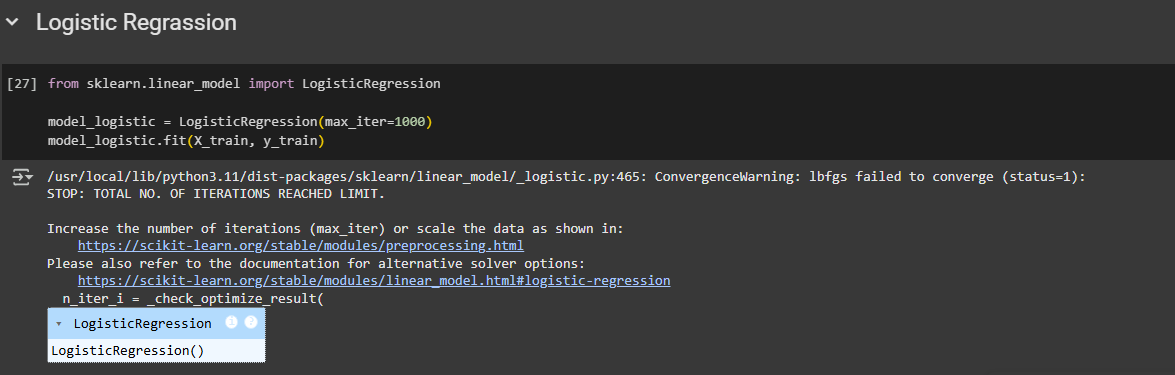

alternatifnya
* menerapkan scaling pada data
* meningkatkan iterasi
* mencoba alternatif sover selain lbfgs (mode default), seperti:
'liblinear' (bagus untuk dataset kecil dan jika Anda memiliki banyak fitur)
'saga' (bagus untuk dataset besar dan mendukung L1 regularization)
'newton-cg', 'sag'

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, classification_report, accuracy_score

In [ ]:
# Lakukan prediksi pada data pengujian
y_pred = model_logistic.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Test: {accuracy}")

Akurasi Test: 0.7577442889606506


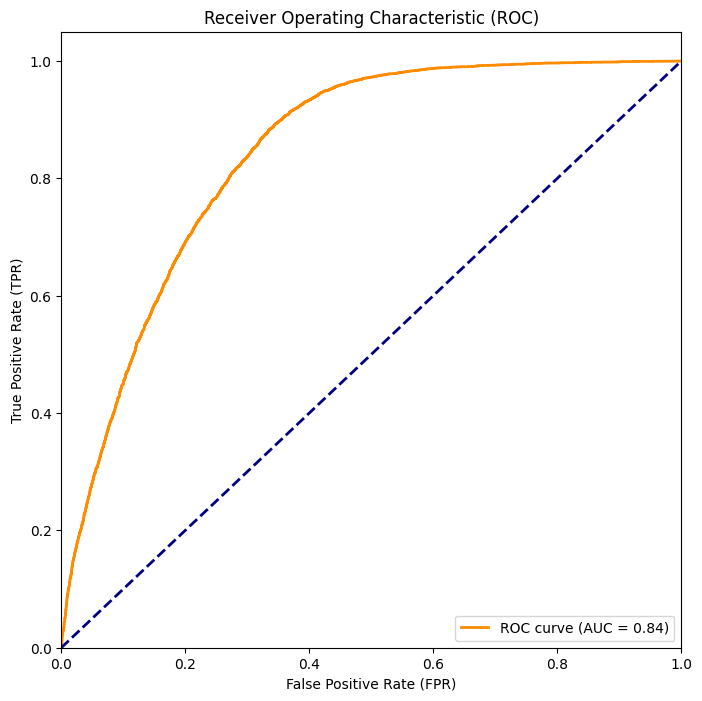

In [ ]:
# 3. Dapatkan Probabilitas Prediksi untuk Data Uji
y_pred_proba = model_logistic.predict_proba(X_test)[:, 1]  # Probabilitas kelas 1

# 4. Hitung FPR, TPR, dan Threshold
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# 5. Hitung AUC
auc = roc_auc_score(y_test, y_pred_proba)

# 6. Plot Kurva ROC
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Garis acak
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

####Confusin Matrix

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
# --- Tambahkan ini: Hitung Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
print("\n")

Confusion Matrix:
[[7186 2252]
 [1799 5485]]




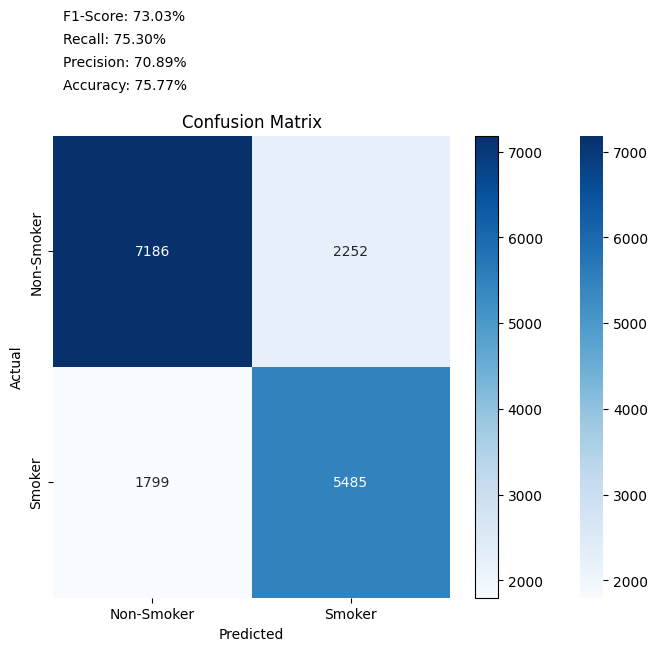

In [ ]:
# 5. Hitung Metrik Evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


# 6. Visualisasikan Confusion Matrix
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Smoker', 'Smoker'],
            yticklabels=['Non-Smoker', 'Smoker'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.colorbar(heatmap.get_children()[0])  # Dapatkan mappable dari heatmap
plt.text(0.05, -0.2, f'Accuracy: {accuracy:.2%}', fontsize=10)
plt.text(0.05, -0.3, f'Precision: {precision:.2%}', fontsize=10)
plt.text(0.05, -0.4, f'Recall: {recall:.2%}', fontsize=10)
plt.text(0.05, -0.5, f'F1-Score: {f1:.2%}', fontsize=10)
plt.show()

In [ ]:
# Print classification report (precision, recall, f1-score)
print("Classification Report Logistic Regression:\n", classification_report(y_test, y_pred))
print('---------------------------------------------------')
# Confusion matrix to understand true positives, false positives, etc.
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=['Actual Non-Smoker', 'Actual Smoker'], columns=['Predicted Non-Smoker', 'Predicted Smoker'])
print("Confusion Matrix:\n", cm_df )
print('---------------------------------------------------')


Classification Report Logistic Regression:
               precision    recall  f1-score   support

           0       0.80      0.76      0.78      9438
           1       0.71      0.75      0.73      7284

    accuracy                           0.76     16722
   macro avg       0.75      0.76      0.76     16722
weighted avg       0.76      0.76      0.76     16722

---------------------------------------------------
Confusion Matrix:
                    Predicted Non-Smoker  Predicted Smoker
Actual Non-Smoker                  7186              2252
Actual Smoker                      1799              5485
---------------------------------------------------


## Random Forest

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.9/395.9 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.7/242.7 kB 15.9 MB/s eta 0:00:00


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import optuna

### Hyperparameter Tuning

In [ ]:
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 200)
    max_depth = trial.suggest_categorical('max_depth', [None, 10, 20, 30])
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 5)

    rf_classifier = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )

    # Split data pelatihan untuk validasi awal
    X_train_opt, X_val_opt, y_train_opt, y_val_opt = train_test_split(
        X_train, y_train, test_size=0.2, random_state=42
    )

    rf_classifier.fit(X_train_opt, y_train_opt)
    y_pred_val = rf_classifier.predict(X_val_opt)
    accuracy = accuracy_score(y_val_opt, y_pred_val)  # Gunakan accuracy pada data validasi

    return accuracy # Optuna akan memaksimalkan nilai accuracy


study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100) # Anda dapat mengubah n_trials sesuai kebutuhan

# Dapatkan parameter terbaik dari Optuna
best_params = study.best_params
print("Parameter terbaik:", best_params)

[I 2025-05-24 08:24:56,026] A new study created in memory with name: no-name-7b912257-5ca3-497a-a4e6-8af2b24d8c2c
[I 2025-05-24 08:25:06,101] Trial 0 finished with value: 0.7714487089126674 and parameters: {'n_estimators': 59, 'max_depth': None, 'min_samples_split': 4, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.7714487089126674.
[I 2025-05-24 08:25:19,901] Trial 1 finished with value: 0.7672839110655475 and parameters: {'n_estimators': 156, 'max_depth': 10, 'min_samples_split': 3, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.7714487089126674.
[I 2025-05-24 08:25:35,536] Trial 2 finished with value: 0.7724738899211893 and parameters: {'n_estimators': 100, 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 4}. Best is trial 2 with value: 0.7724738899211893.
[I 2025-05-24 08:25:53,180] Trial 3 finished with value: 0.7708079707823413 and parameters: {'n_estimators': 103, 'max_depth': 30, 'min_samples_split': 7, 'min_samples_leaf': 1}. Best is trial 2 with va

Parameter terbaik: {'n_estimators': 173, 'max_depth': None, 'min_samples_split': 7, 'min_samples_leaf': 3}


### Modelling Data

In [ ]:
# Inisialisasi model Random Forest dengan hyperparameter yang diberikan
rf_classifier = RandomForestClassifier(
    n_estimators=173,
    max_depth=None,
    min_samples_split=7,
    min_samples_leaf=3,
    random_state=42  # Untuk hasil yang dapat direproduksi
)

# Latih model
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=3, min_samples_split=7,
                       n_estimators=173, random_state=42)

#### ROF AUC

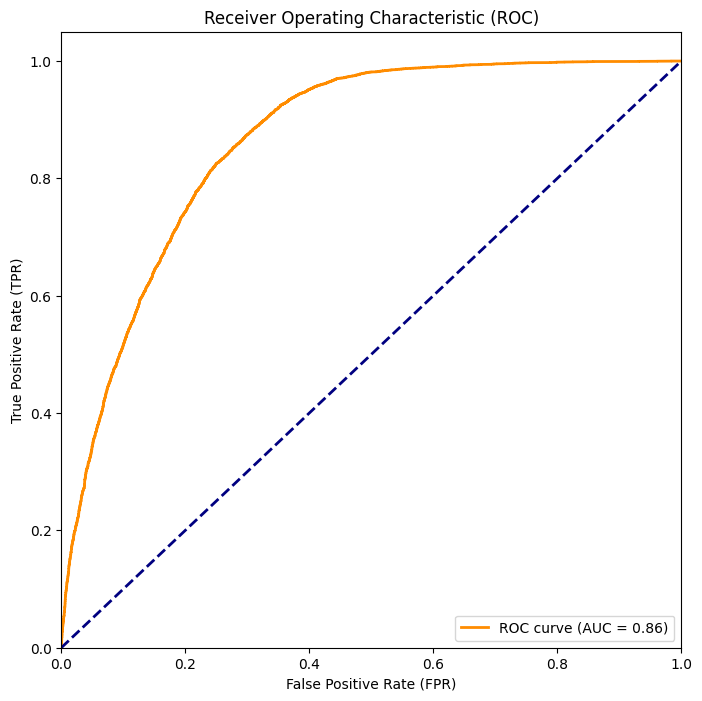

In [ ]:
# 3. Dapatkan Probabilitas Prediksi untuk Data Uji
y_pred_proba =rf_classifier.predict_proba(X_test)[:, 1]  # Probabilitas kelas 1

# 4. Hitung FPR, TPR, dan Threshold
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# 5. Hitung AUC
auc = roc_auc_score(y_test, y_pred_proba)

# 6. Plot Kurva ROC
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Garis acak
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

### Confusin Matrix

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
# Lakukan prediksi pada data pengujian
y_pred = rf_classifier.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Test: {accuracy}")

Akurasi Test: 0.7826216959693817


In [ ]:
# Print classification report (precision, recall, f1-score)
print("Classification Report Logistic Regression:\n", classification_report(y_test, y_pred))
print('---------------------------------------------------')
# Confusion matrix to understand true positives, false positives, etc.
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=['Actual Non-Smoker', 'Actual Smoker'], columns=['Predicted Non-Smoker', 'Predicted Smoker'])
print("Confusion Matrix:\n", cm_df )
print('---------------------------------------------------')

Classification Report Logistic Regression:
               precision    recall  f1-score   support

           0       0.84      0.76      0.80      9438
           1       0.72      0.81      0.77      7284

    accuracy                           0.78     16722
   macro avg       0.78      0.79      0.78     16722
weighted avg       0.79      0.78      0.78     16722

---------------------------------------------------
Confusion Matrix:
                    Predicted Non-Smoker  Predicted Smoker
Actual Non-Smoker                  7164              2274
Actual Smoker                      1361              5923
---------------------------------------------------


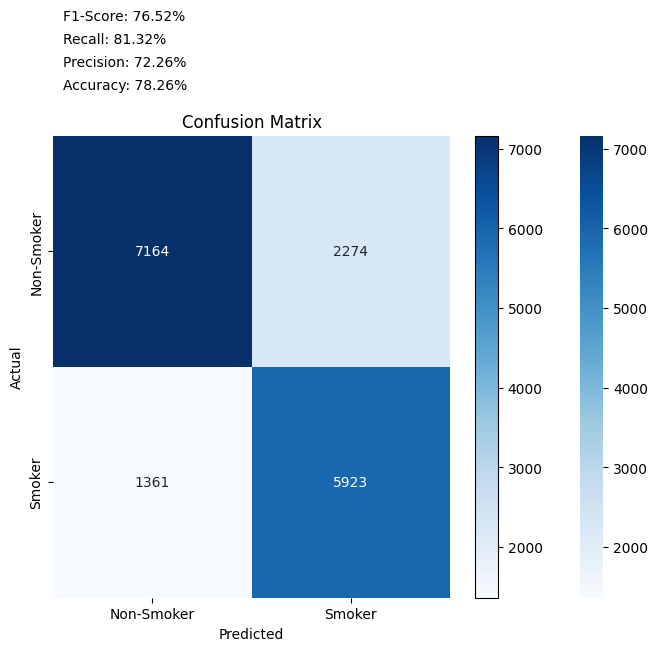

In [ ]:
# 5. Hitung Metrik Evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# 6. Visualisasikan Confusion Matrix
plt.figure(figsize=(8, 6))

heatmap = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Smoker', 'Smoker'],
            yticklabels=['Non-Smoker', 'Smoker'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.colorbar(heatmap.get_children()[0])  # Dapatkan mappable dari heatmap
plt.text(0.05, -0.2, f'Accuracy: {accuracy:.2%}', fontsize=10)
plt.text(0.05, -0.3, f'Precision: {precision:.2%}', fontsize=10)
plt.text(0.05, -0.4, f'Recall: {recall:.2%}', fontsize=10)
plt.text(0.05, -0.5, f'F1-Score: {f1:.2%}', fontsize=10)
plt.show()

### Evaluation Matrix

In [ ]:
# Lakukan prediksi pada data pengujian
y_pred = rf_classifier.predict(X_test)

# Evaluasi model
recall = recall_score(y_test, y_pred)
print(f"Recall Test: {recall}")

Recall Test: 0.8131521142229544


In [ ]:
# Lakukan prediksi pada data pengujian
y_pred = rf_classifier.predict(X_test)

# Evaluasi model
roc_auc = roc_auc_score(y_test, y_pred)
print(f"roc_auc Test: {roc_auc}")

roc_auc Test: 0.7861056184592203


### Save Model

In [ ]:
import joblib

In [ ]:
model_filename = '/content/drive/MyDrive/2. Mechine Learning/Kelas ML/PROJECT/FINAL Project: Smoker Detector/Model/Smoker_RF.joblib'
joblib.dump(rf_classifier, model_filename)
print(f"Model disimpan di: {model_filename}")

Model disimpan di: /content/drive/MyDrive/2. Mechine Learning/Kelas ML/PROJECT/FINAL Project: Smoker Detector/Model/Smoker_RF.joblib


### Feature Importance

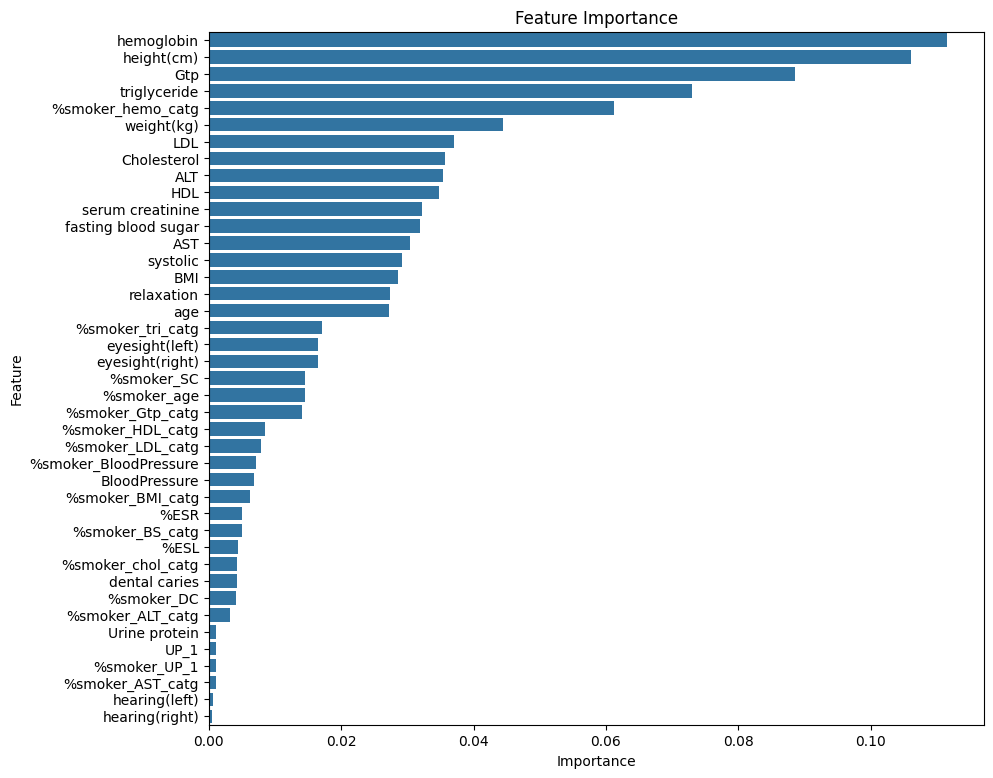

In [ ]:
# Feature Importance
feature_importances = rf_classifier.feature_importances_
feature_names = X_train.columns

# Buat DataFrame untuk visualisasi
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 9))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

## AdaBOOST

In [ ]:
# import adaboostclassifier

from sklearn.ensemble import AdaBoostClassifier

### Hyperparameter Tuning

####Plotting Error_Rate Vs N Estimator

In [ ]:
error_rates = []

for i in range(1,50):

    model = AdaBoostClassifier(n_estimators = i)
    model.fit(X_train,y_train)
    ypred = model.predict(X_test)
    accuracy = np.mean(ypred == y_test)
    error = 1 - accuracy
    error_rates.append(error)

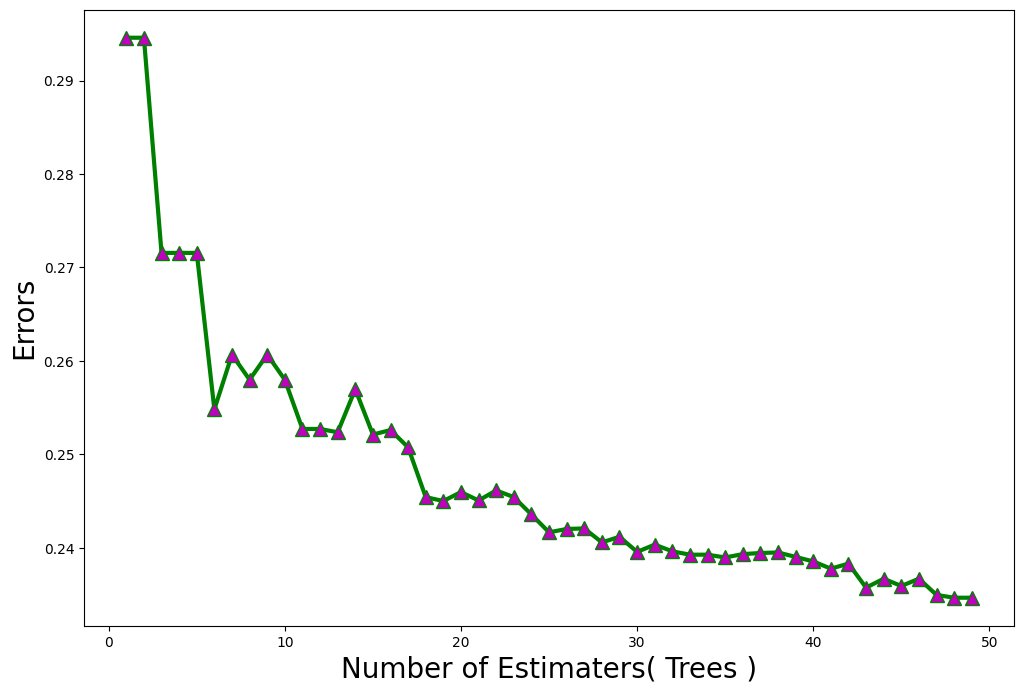

In [ ]:
#Plotting Error_Rate Vs Number of Estimators
plt.figure(figsize = (12,8))
plt.plot(range(1,50),error_rates, 'g', lw = 3, marker ="^", markersize = 10, markerfacecolor = "m")
plt.xlabel('Number of Estimaters( Trees )',fontsize = 20)
plt.ylabel('Errors',fontsize = 20)
plt.show()

####Plotting Error_Rate Vs Learning Rate

In [ ]:
error_rates = []

for i in [0.0001,0.0001,0.001,0.01,0.1,1,1.1,1.2,1.3,1.4,1.5]:

    model = AdaBoostClassifier(learning_rate= i)
    model.fit(X_train,y_train)
    ypred = model.predict(X_test)
    accuracy = np.mean(ypred == y_test)
    error = 1 - accuracy
    error_rates.append(error)

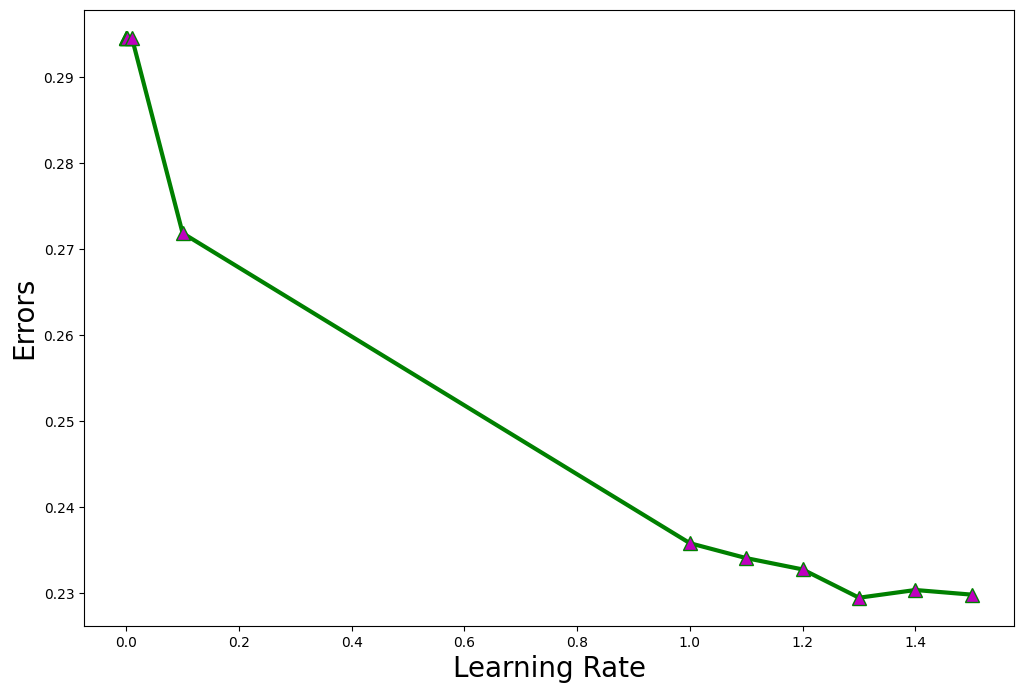

In [ ]:
#Plotting Error and Learning Rate
plt.figure(figsize = (12,8))
plt.plot([0.0001,0.0001,0.001,0.01,0.1,1,1.1,1.2,1.3,1.4,1.5],error_rates, 'g', lw = 3, marker ="^", markersize = 10, markerfacecolor = "m")
plt.xlabel('Learning Rate',fontsize = 20)
plt.ylabel('Errors',fontsize = 20)
plt.show()

####Estimating Number of Max Depth



In [ ]:
from sklearn.tree import DecisionTreeClassifier

error_rates = []

for i in (1,5,10, 15, 20, 25, 30, 35, 40, 45, 50):
    dt = DecisionTreeClassifier(random_state=42,max_depth = i)
    model = AdaBoostClassifier(estimator=dt)
    model.fit(X_train,y_train)
    ypred = model.predict(X_test)
    accuracy = np.mean(ypred == y_test)
    error = 1 - accuracy
    error_rates.append(error)

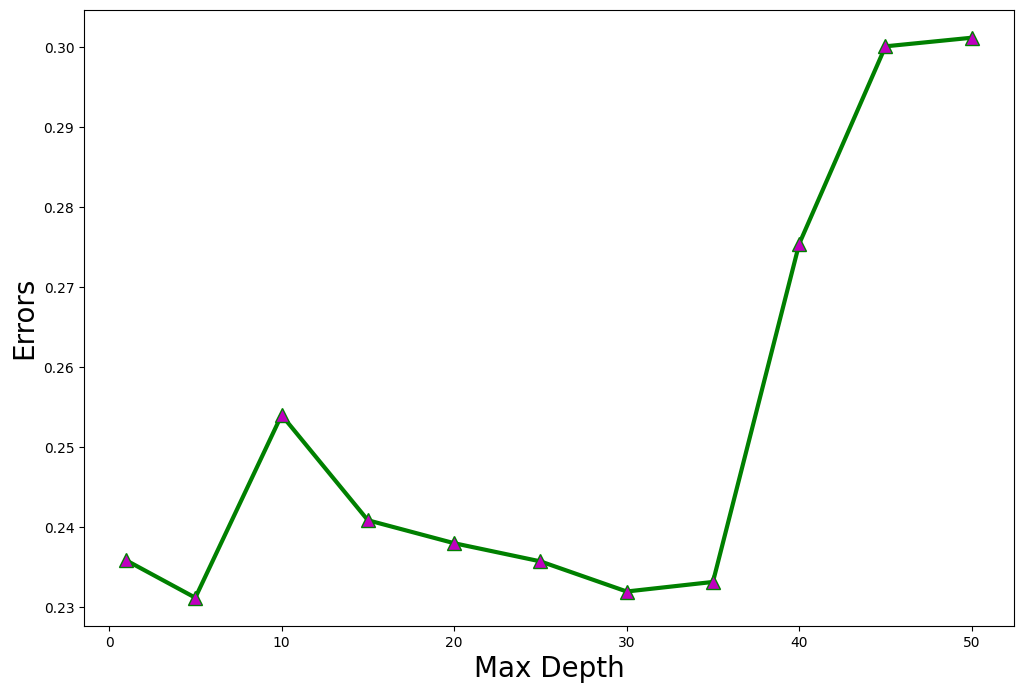

In [ ]:
#Plotting Error vs Max Depth

plt.figure(figsize=(12, 8))
plt.plot((1,5,10, 15, 20, 25, 30, 35, 40, 45, 50), error_rates, 'g', lw=3, marker="^", markersize=10, markerfacecolor="m")
plt.xlabel('Max Depth', fontsize=20)
plt.ylabel('Errors', fontsize=20)
plt.show()

#### Use The Lest error hyper parameter to be the range of hyperparameter tunning

In [ ]:
'''from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform, randint'''
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [ ]:
def objective(trial):

    n_estimators = trial.suggest_categorical('n_estimators',[48, 49, 50] ) # Rentang integer dari 43 hingga 49
    learning_rate = trial.suggest_categorical('learning_rate', [1.3, 1.4, 1.5])
    estimator_max_depth = trial.suggest_categorical('estimator_max_depth', [5, 30]) # Rentang integer dari 5 hingga 30
    base_estimator = DecisionTreeClassifier(max_depth=estimator_max_depth, random_state=42)


    adaboost_classifier = AdaBoostClassifier(
        estimator=base_estimator, # Teruskan instance base_estimator yang sudah dibuat
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        random_state=42
    )


    score = cross_val_score(adaboost_classifier, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)

    return score.mean() # Mengembalikan rata-rata akurasi dari cross-validation


# Membuat dan Menjalankan Studi Optuna
study = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler(seed=42)) # Menambahkan seed untuk reproduktifitas
print("Memulai optimasi hyperparameter dengan Optuna...")
study.optimize(objective, n_trials=18, show_progress_bar=True)

# Dapatkan parameter terbaik dari Optuna
best_params = study.best_params
print("\nParameter terbaik yang ditemukan oleh Optuna:")
print(best_params)

# Dapatkan skor terbaik
print("Skor akurasi terbaik (rata-rata cross-validation):")
print(study.best_value)

# Bangun ulang model terbaik dengan parameter yang ditemukan Optuna
best_base_estimator = DecisionTreeClassifier(
    max_depth=best_params['estimator_max_depth'],
    random_state=42
)
best_adaboost_model = AdaBoostClassifier(
    estimator=best_base_estimator,
    n_estimators=best_params['n_estimators'],
    learning_rate=best_params['learning_rate'],
    random_state=42
)

# Latih model terbaik pada seluruh data pelatihan (X_train, y_train)
best_adaboost_model.fit(X_train, y_train)
print("\nModel AdaBoost terbaik telah dilatih menggunakan parameter Optuna.")

[I 2025-06-22 06:46:19,685] A new study created in memory with name: no-name-935ecc31-2068-4976-bcbf-e1f47c2cc438


Memulai optimasi hyperparameter dengan Optuna...


  0%|          | 0/18 [00:00<?, ?it/s]

[I 2025-06-22 06:52:15,284] Trial 0 finished with value: 0.762516819375921 and parameters: {'n_estimators': 49, 'learning_rate': 1.3, 'estimator_max_depth': 30}. Best is trial 0 with value: 0.762516819375921.
[I 2025-06-22 06:58:08,302] Trial 1 finished with value: 0.762516819375921 and parameters: {'n_estimators': 49, 'learning_rate': 1.3, 'estimator_max_depth': 30}. Best is trial 0 with value: 0.762516819375921.
[I 2025-06-22 07:04:09,450] Trial 2 finished with value: 0.7629012622541167 and parameters: {'n_estimators': 49, 'learning_rate': 1.4, 'estimator_max_depth': 30}. Best is trial 2 with value: 0.7629012622541167.
[I 2025-06-22 07:05:33,467] Trial 3 finished with value: 0.755994105209201 and parameters: {'n_estimators': 49, 'learning_rate': 1.4, 'estimator_max_depth': 5}. Best is trial 2 with value: 0.7629012622541167.
[I 2025-06-22 07:06:57,466] Trial 4 finished with value: 0.7583776510540142 and parameters: {'n_estimators': 50, 'learning_rate': 1.3, 'estimator_max_depth': 5}. 

###Modelling Data

In [ ]:
model_filename = '/content/drive/MyDrive/2. Mechine Learning/Kelas ML/PROJECT/FINAL Project: Smoker Detector/Model/Smoker_AdaBoost.joblib' #ganti model_fraud dengan nama model yang diinginkan
joblib.dump(best_adaboost_model, model_filename)
print(f"Model disimpan di: {model_filename}")

Model disimpan di: /content/drive/MyDrive/2. Mechine Learning/Kelas ML/PROJECT/FINAL Project: Smoker Detector/Model/Smoker_AdaBoost.joblib


#### ROC- AUC

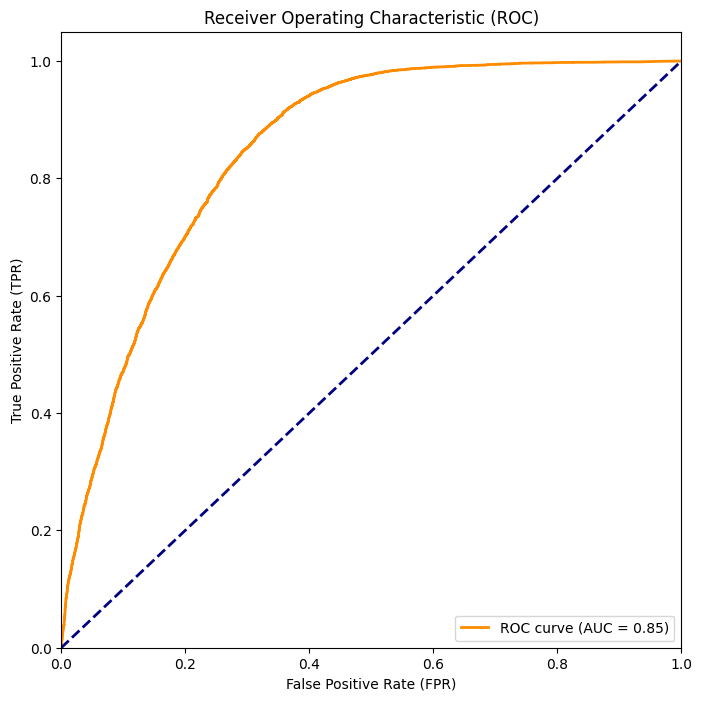

In [ ]:
# 3. Dapatkan Probabilitas Prediksi untuk Data Uji
y_pred_proba =best_adaboost_model.predict_proba(X_test)[:, 1]  # Probabilitas kelas 1

# 4. Hitung FPR, TPR, dan Threshold
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# 5. Hitung AUC
auc = roc_auc_score(y_test, y_pred_proba)

# 6. Plot Kurva ROC
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Garis acak
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

### Confusion Matrix

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
# Lakukan prediksi pada data pengujian
y_pred = best_adaboost_model.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Test: {accuracy}")

Akurasi Test: 0.7649802655184786


In [ ]:
# Print classification report (precision, recall, f1-score)
print("Classification Report Logistic Regression:\n", classification_report(y_test, y_pred))
print('---------------------------------------------------')
# Confusion matrix to understand true positives, false positives, etc.
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=['Actual Non-Smoker', 'Actual Smoker'], columns=['Predicted Non-Smoker', 'Predicted Smoker'])
print("Confusion Matrix:\n", cm_df )
print('---------------------------------------------------')

Classification Report Logistic Regression:
               precision    recall  f1-score   support

           0       0.82      0.75      0.78      9438
           1       0.71      0.79      0.74      7284

    accuracy                           0.76     16722
   macro avg       0.76      0.77      0.76     16722
weighted avg       0.77      0.76      0.77     16722

---------------------------------------------------
Confusion Matrix:
                    Predicted Non-Smoker  Predicted Smoker
Actual Non-Smoker                  7072              2366
Actual Smoker                      1564              5720
---------------------------------------------------


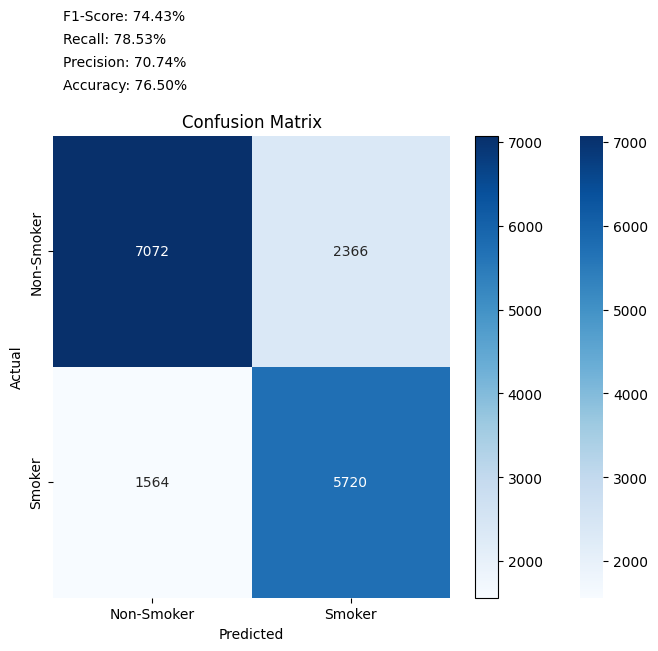

In [ ]:
# 5. Hitung Metrik Evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# 6. Visualisasikan Confusion Matrix
plt.figure(figsize=(8, 6))

heatmap = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Smoker', 'Smoker'],
            yticklabels=['Non-Smoker', 'Smoker'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.colorbar(heatmap.get_children()[0])  # Dapatkan mappable dari heatmap
plt.text(0.05, -0.2, f'Accuracy: {accuracy:.2%}', fontsize=10)
plt.text(0.05, -0.3, f'Precision: {precision:.2%}', fontsize=10)
plt.text(0.05, -0.4, f'Recall: {recall:.2%}', fontsize=10)
plt.text(0.05, -0.5, f'F1-Score: {f1:.2%}', fontsize=10)
plt.show()

In [ ]:
# Predict on the validation set
y_pred =best_adaboost_model.predict(X_test)

# Predict probabilities for ROC-AUC evaluation
y_pred_prob = best_adaboost_model.predict_proba(X_test)[:, 1]

In [ ]:
# Evaluasi model
accuracy = accuracy_score(y_pred, y_pred)
print(f"Akurasi Validation: {accuracy}")

Akurasi Validation: 0.4997607941633776


### Evaluation Matrix

In [ ]:
# Lakukan prediksi pada data pengujian
y_pred = best_adaboost_model.predict(X_test)

# Evaluasi model
recall = recall_score(y_test, y_pred)
print(f"Recall Test: {recall}")

Recall Test: 0.785282811641955


In [ ]:
# Lakukan prediksi pada data pengujian
y_pred = best_adaboost_model.predict(X_test)

# Evaluasi model
roc_auc = roc_auc_score(y_test, y_pred)
print(f"roc_auc Test: {roc_auc}")

roc_auc Test: 0.7672970532038976


###Feature Importance

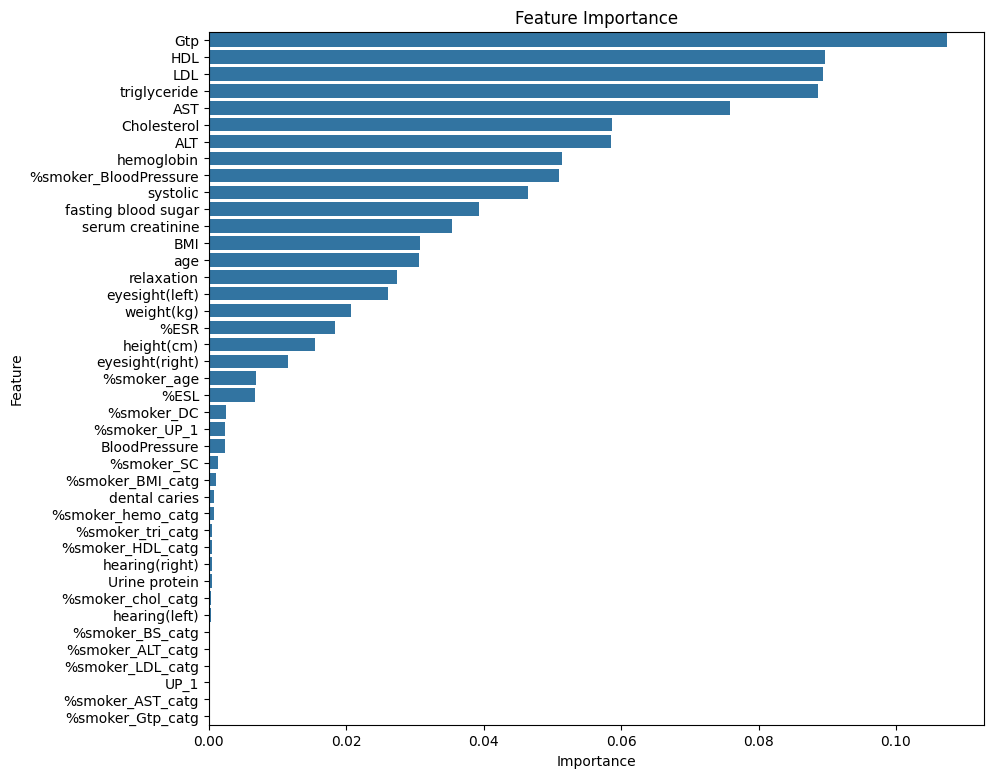

In [ ]:
# Feature Importance
feature_importances = best_adaboost_model.feature_importances_
feature_names = X_train.columns

# Buat DataFrame untuk visualisasi
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 9))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

## Neural Network

In [ ]:
# Instalasi bayes_opt
!pip install bayesian-optimization

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import random
from sklearn.preprocessing import StandardScaler          # untuk transform data, normalisasi
from bayes_opt import BayesianOptimization

In [ ]:

# Set random seeds for reproducibility, agar ngka random yang digenerate selalu sama
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)

# Define the neural network architecture
def create_model(learning_rate, num_hidden_layers, num_neurons):
    model = tf.keras.Sequential()
    for i in range(num_hidden_layers):                                                # settingan untuk di hidden layer
        model.add(tf.keras.layers.Dense(num_neurons, activation='tanh'))              # define fungis aktivasi yang di hidden layer
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))                         # define fungsi aktivasi di layer output, ada 1 NEURON OUTPUT di lapisan output karena model prediksi klasifikasi biner. pakai SIGMOID
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

- Set Random Seeds: Menetapkan seed acak untuk numpy, TensorFlow, dan random untuk memastikan bahwa hasil dari kode ini dapat direproduksi. Dengan menetapkan seed, Anda memastikan bahwa setiap kali kode ini dijalankan, hasilnya akan sama.

- create_model Function: Fungsi ini digunakan untuk membuat model neural network dengan parameter yang dapat disesuaikan, yaitu learning_rate, num_hidden_layers, dan num_neurons. Menambahkan layer output dengan **1 neuron** dan menggunakan fungsi aktivasi sigmoid (0 - 1) untuk menghasilkan probabilitas

- Optimizer: Menggunakan optimizer Adam

- Menggunaka loss function binary_crossentropy yang sering digunakan dalam klasifikasi multi-kelas.

In [ ]:
# Define the objective function to optimize
def objective(learning_rate, num_hidden_layers, num_neurons):
    model = create_model(learning_rate, int(num_hidden_layers), int(num_neurons))
    model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), verbose=0)
    val_loss, val_acc = model.evaluate(X_test, y_test, verbose=0)
    return val_acc

Mengevaluasi model pada data validasi X_test dan y_test untuk mendapatkan loss validasi (val_loss) dan akurasi validasi (val_acc). Parameter verbose=0 digunakan untuk menyembunyikan output evaluasi.

In [ ]:
# Define the search space for hyperparameters
pbounds = {'learning_rate': (0.01, 0.1),  # atur rentang nilai yang ingin dicoba pemcoba renang nilai dari 0.01 dampai 0.1
           'num_hidden_layers': (1, 3),  # nilainya harus rentang,
           'num_neurons': (41, 52)}

Bayes Optimization mengharuskan kita memasukkan nilai rentang,

- tidak bisa hanya 1 nilai,
- tidak bisa 3 nilai
- harus menulis nilai max dan nilai min pencarian
- batas bawah harus lebih kecil dari batas atas

In [ ]:
# Perform Bayesian optimization
optimizer = BayesianOptimization(f=objective, pbounds=pbounds, verbose=2)
optimizer.maximize(init_points=5, n_iter=20)

|   iter    |  target   | learni... | num_hi... | num_ne... |
-------------------------------------------------------------
| 2         | 0.5644061 | 0.0508834 | 1.5219346 | 46.096556 |
| 3         | 0.5645257 | 0.0682858 | 1.0802967 | 48.067460 |
| 4         | 0.5644061 | 0.0586554 | 1.5453625 | 50.357094 |
| 5         | 0.5645257 | 0.0192640 | 1.1428321 | 43.899009 |
| 6         | 0.5644659 | 0.0211635 | 1.6144890 | 46.320993 |
| 7         | 0.5644061 | 0.0508712 | 2.2837711 | 44.238045 |
| 8         | 0.5644061 | 0.0574112 | 2.1471174 | 47.433524 |
| 9         | 0.5644659 | 0.0707516 | 1.6405192 | 47.158973 |
| 10        | 0.5644659 | 0.0177685 | 2.5712787 | 43.840965 |
| 11        | 0.5644061 | 0.0415233 | 1.1073456 | 42.371159 |
| 12        | 0.5644659 | 0.0168357 | 1.6155305 | 46.330392 |
| 13        | 0.5644061 | 0.0410938 | 2.9601213 | 50.858493 |
| 14        | 0.5644061 | 0.0348366 | 1.7814604 | 51.721458 |
| 15        | 0.5644659 | 0.0355191 | 1.1291938 | 43.373061 |
| 16    

In [ ]:
# best hyper parameter:
# learning rate: 0.0682858
# num hidden layer: 1.0802967 ==> 1
# num_neuron: 48.067460 => 48
#fungsi aktifasi:

Use The Best Hyperparameter

In [ ]:
# set random seed for reproductifity
np.random.seed(42)          #.seed, akan membuat angka random yg dihasilkan tetap sama pada library numpy
tf.random.set_seed(42)      #.set_seed, akn menghasilkan angka random yang sama pada tensor flow
random.seed(42)             #.seed, akan membuat angka random yg dihasilkan oleh library random

from keras.models import Sequential  # import kelas Sequential dari modul models dari library keras
# Kelas ini digunakan untuk membangun model deep learning yang memiliki struktur lapisan (layer)
# yang berurutan, atau sering disebut sebagai neural network feedforward.
from keras.layers import Dense  #untuk mengimpor fungsi Dense dari modul layers dalam library Keras.
# layers, berisi berbagai macam lapisan (layer) yang dapat digunakan untuk membangun arsitektur model neural network.
# Dense ,fungsi untuk membuat lapisan dense (fully connected) dalam model neural network. Lapisan dense menghubungkan setiap neuron pada lapisan sebelumnya dengan setiap neuron pada lapisan selanjutnya.


In [ ]:
model = Sequential()
model.add(Dense(48, input_dim=41, activation='tanh'))
model.add(Dense(48, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.fit(X_train, y_train, epochs=20, batch_size=8)

Epoch 1/20
9755/9755 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.6956 - loss: 0.5710
Epoch 2/20
9755/9755 ━━━━━━━━━━━━━━━━━━━━ 43s 2ms/step - accuracy: 0.7151 - loss: 0.5460
Epoch 3/20
9755/9755 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 0.7147 - loss: 0.5426
Epoch 4/20
9755/9755 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.7220 - loss: 0.5350
Epoch 5/20
9755/9755 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - accuracy: 0.7201 - loss: 0.5392
Epoch 6/20
9755/9755 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 0.7228 - loss: 0.5331
Epoch 7/20
9755/9755 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step - accuracy: 0.7269 - loss: 0.5286
Epoch 8/20
9755/9755 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 0.7269 - loss: 0.5276
Epoch 9/20
9755/9755 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 0.7260 - loss: 0.5263
Epoch 10/20
9755/9755 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.7279 - loss: 0.5214
Epoch 11/20
9755/9755 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.7266 - loss: 0.5243
Epoch 12/20
9755/97

In [ ]:
import joblib
#savemodel
model_filename = '/content/drive/MyDrive/2. Mechine Learning/Kelas ML/PROJECT/FINAL Project: Smoker Detector/Model/Smoker_NN.joblib'
joblib.dump(model, model_filename)

['/content/drive/MyDrive/2. Mechine Learning/Kelas ML/PROJECT/FINAL Project: Smoker Detector/Model/Smoker_NN.joblib']

In [ ]:
# Evaluasi model pada data test
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)
accuracy_test = accuracy_score(y_test, y_pred)
print(f"akurasi pada data pengujian: {accuracy_test}")

523/523 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
akurasi pada data pengujian: 0.7407008731013037


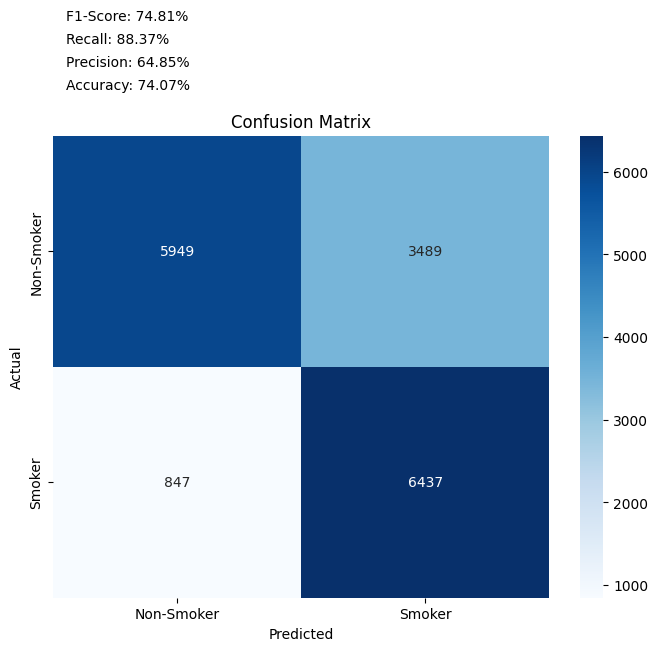

In [ ]:
# 5. Hitung Metrik Evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# 6. Visualisasikan Confusion Matrix
plt.figure(figsize=(8, 6))

heatmap = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Smoker', 'Smoker'],
            yticklabels=['Non-Smoker', 'Smoker'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.text(0.05, -0.2, f'Accuracy: {accuracy:.2%}', fontsize=10)
plt.text(0.05, -0.3, f'Precision: {precision:.2%}', fontsize=10)
plt.text(0.05, -0.4, f'Recall: {recall:.2%}', fontsize=10)
plt.text(0.05, -0.5, f'F1-Score: {f1:.2%}', fontsize=10)
plt.show()

523/523 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


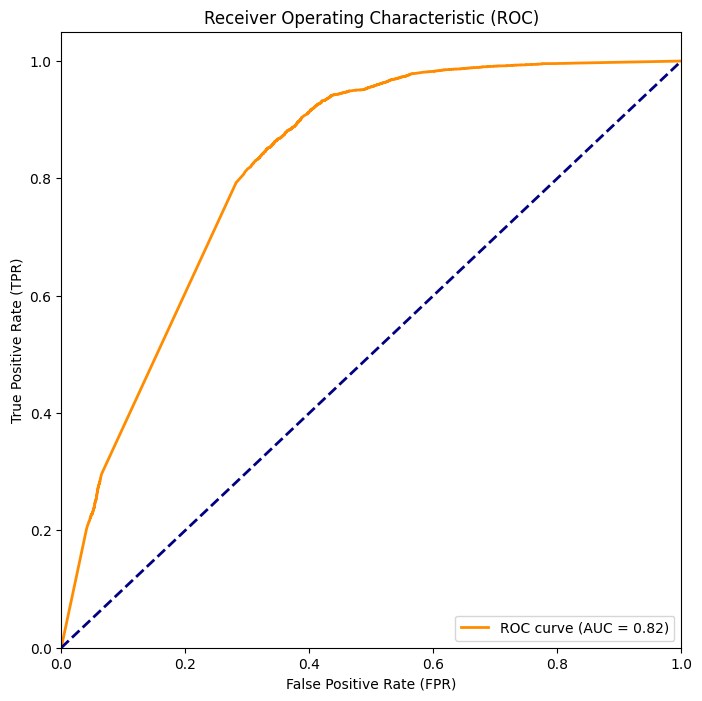

In [ ]:
# 3. Dapatkan Probabilitas Prediksi untuk Data Uji
# model.predict() dengan layer output single neuron dan sigmoid akan menghasilkan probabilitas untuk kelas positif (kelas 1)
y_pred_proba = model.predict(X_test)

# Jika outputnya 2D dengan 1 kolom, kita bisa meratakannya menjadi 1D
if y_pred_proba.shape[1] == 1:
    y_pred_proba = y_pred_proba.flatten()

# 4. Hitung FPR, TPR, dan Threshold
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# 5. Hitung AUC
auc = roc_auc_score(y_test, y_pred_proba)

# 6. Plot Kurva ROC
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Garis acak
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()